## An√°lisis del laboratorio de masa

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import custom libraries
import warnings
import sys
import os

# Subir dos niveles desde notebooks/mod_tecnico/ hasta la ra√≠z del repo
repo_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))  
sys.path.append(repo_path)

# Ahora intenta importar
from src.data_processing import ready_to_import

In [3]:
#Importar librerias para graficar
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots  import make_subplots

In [4]:
# Importamos lo necesario para trabajar con consultas SQL

from pandasql import sqldf

# Definir funci√≥n de consulta
pysqldf = lambda q: sqldf(q, globals())

#### Se carga el dataset 

In [5]:
# Import data from Excel files
url = "https://raw.githubusercontent.com/MiguelOscar-Insco/data-INSCO-hub/main/data/raw/temperatura_25.xlsx"
temperatura = pd.read_excel(url)

In [6]:
# Resumen estad√≠stico de la tabla
temperatura.describe()

lab_received_date        scheduled_delivery_date  \
count                            603                            563   
mean   2025-01-21 03:37:18.805970176  2025-02-15 04:41:20.994671360   
min              2024-09-09 00:00:00            2024-12-27 00:00:00   
25%              2024-12-13 00:00:00            2025-01-24 00:00:00   
50%              2025-01-22 00:00:00            2025-02-10 00:00:00   
75%              2025-02-21 00:00:00            2025-03-10 12:00:00   
max              2025-03-26 00:00:00            2025-04-10 00:00:00   
std                              NaN                            NaN   

       cleaning_date               calibration_date  \
count            0.0                            603   
mean             NaN  2025-02-03 22:07:45.671641856   
min              NaN            2024-12-09 00:00:00   
25%              NaN            2025-01-13 00:00:00   
50%              NaN            2025-01-30 00:00:00   
75%              NaN            2025-02-26 00:00:00   
max              NaN            2025-03-28 00:00:00   
std              NaN                            NaN   

                       delivery_date  delivery_time  assigned_time  \
count                            603     603.000000     603.000000   
mean   2025-02-09 21:29:33.134328320      11.854063      15.751244   
min              2025-01-06 00:00:00       1.000000       0.000000   
25%              2025-01-17 00:00:00       4.000000      12.000000   
50%              2025-02-04 00:00:00       9.000000      14.000000   
75%              2025-03-05 00:00:00      18.000000      20.500000   
max              2025-03-31 00:00:00      36.000000      38.000000   
std                              NaN       9.661992       8.847047   

       substitution_reason  piece_count  
count                  0.0        603.0  
mean                   NaN          1.0  
min                    NaN          1.0  
25%                    NaN          1.0  
50%                    NaN          1.0  
75%                    NaN          1.0  
max                    NaN          1.0  
std                    NaN          0.0

In [7]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 633 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   cleaning_date            0 non-null      float64       
 10  calibration_date         603 non-null    datetime64[ns]
 11  delivery_date            603 non-null    datetime64[ns]
 12  delivery_time            603 non-nul

In [8]:
temperatura.isnull().sum()

report_number               30
so                          30
assignee                     0
calibrator                  30
supervisor                  31
approver                    35
classification              30
lab_received_date           30
scheduled_delivery_date     70
cleaning_date              633
calibration_date            30
delivery_date               30
delivery_time               30
process_status              30
assigned_time               30
service_location            30
substitution_reason        633
lab_observations           557
priority                    30
piece_count                 30
dtype: int64

In [9]:
temperatura.dtypes

report_number                      object
so                                 object
assignee                           object
calibrator                         object
supervisor                         object
approver                           object
classification                     object
lab_received_date          datetime64[ns]
scheduled_delivery_date    datetime64[ns]
cleaning_date                     float64
calibration_date           datetime64[ns]
delivery_date              datetime64[ns]
delivery_time                     float64
process_status                     object
assigned_time                     float64
service_location                   object
substitution_reason               float64
lab_observations                   object
priority                           object
piece_count                       float64
dtype: object

In [10]:
# Se hace una copia de la tabla para evitar problemas de referencia
temp = temperatura.copy()

In [11]:
temp = ready_to_import.to_prepare_db(temp)
# Verificamos nuevamente los tipos de datos de cada columna y la cantidad de datos nulos
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 603 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   cleaning_date            0 non-null      float64       
 10  calibration_date         603 non-null    datetime64[ns]
 11  delivery_date            603 non-null    datetime64[ns]
 12  delivery_time            603 non-nul

In [12]:
pieces = pysqldf("""
                 SELECT piece_count, COUNT(piece_count) AS count
                 FROM temp
                 GROUP BY piece_count
                 """)
pieces

piece_count  count
0          1.0    603

In [13]:
temp.loc[temp['lab_observations'].isnull() == False]
#temp.describe()

report_number     so                                           assignee  \
44   CCM0045.T/2025  I0046                                   Tania Nieto Lima   
136  CCM0147.T/2025  I0161                                   Tania Nieto Lima   
139  CCM0150.T/2025  I0172  David Bautista Hern√°ndez, Laura Ivonne P√©rez G...   
151  CCM0162.T/2025  I0187                           David Bautista Hern√°ndez   
152  CCM0163.T/2025  I0187                           David Bautista Hern√°ndez   
..              ...    ...                                                ...   
538  CCM2989.T/2024  H2432                          Mariela S√°nchez Vel√°zquez   
539  CCM2990.T/2024  H2432                          Mariela S√°nchez Vel√°zquez   
567  CCM3018.T/2024  H2464                          Mariela S√°nchez Vel√°zquez   
568  CCM3019.T/2024  H2464                          Mariela S√°nchez Vel√°zquez   
569  CCM3020.T/2024  H2464                          Mariela S√°nchez Vel√°zquez   

                    calibrator                  supervisor  \
44            Tania Nieto Lima    Ramiro Mart√≠nez Espinosa   
136           Tania Nieto Lima    Ramiro Mart√≠nez Espinosa   
139   David Bautista Hern√°ndez    Ramiro Mart√≠nez Espinosa   
151   David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
152   David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
..                         ...                         ...   
538  Mariela S√°nchez Vel√°zquez  Dulce Mar√≠a Ram√≠rez Contla   
539  Mariela S√°nchez Vel√°zquez  Dulce Mar√≠a Ram√≠rez Contla   
567  Mariela S√°nchez Vel√°zquez  Dulce Mar√≠a Ram√≠rez Contla   
568  Mariela S√°nchez Vel√°zquez  Dulce Mar√≠a Ram√≠rez Contla   
569  Mariela S√°nchez Vel√°zquez  Dulce Mar√≠a Ram√≠rez Contla   

                       approver classification lab_received_date  \
44     Ramiro Mart√≠nez Espinosa            RTD        2025-01-15   
136    Ramiro Mart√≠nez Espinosa            TLD        2025-01-31   
139    Ramiro Mart√≠nez Espinosa            TLD        2025-02-04   
151  Dulce Mar√≠a Ram√≠rez Contla            TLD        2025-02-07   
152  Dulce Mar√≠a Ram√≠rez Contla            TLD        2025-02-07   
..                          ...            ...               ...   
538  Dulce Mar√≠a Ram√≠rez Contla            TLD        2024-12-11   
539  Dulce Mar√≠a Ram√≠rez Contla            TLD        2024-12-11   
567  Dulce Mar√≠a Ram√≠rez Contla            TLD        2024-12-17   
568  Dulce Mar√≠a Ram√≠rez Contla            TLD        2024-12-17   
569  Dulce Mar√≠a Ram√≠rez Contla            TLD        2024-12-17   

    scheduled_delivery_date  cleaning_date calibration_date delivery_date  \
44               2025-01-27            NaN       2025-01-15    2025-01-22   
136              2025-02-10            NaN       2025-02-24    2025-02-25   
139                     NaT            NaN       2025-02-05    2025-02-06   
151              2025-02-28            NaN       2025-02-11    2025-02-13   
152              2025-02-28            NaN       2025-02-11    2025-02-13   
..                      ...            ...              ...           ...   
538              2025-01-15            NaN       2025-01-09    2025-01-16   
539              2025-01-15            NaN       2025-01-09    2025-01-16   
567              2025-01-22            NaN       2025-01-08    2025-01-16   
568              2025-01-22            NaN       2025-01-08    2025-01-16   
569              2025-01-22            NaN       2025-01-08    2025-01-16   

     delivery_time process_status  assigned_time service_location  \
44             5.0      ENTREGADO            8.0              LAB   
136           16.0      ENTREGADO            5.0            SITIO   
139            1.0      ENTREGADO            0.0            SITIO   
151            4.0      ENTREGADO           15.0              LAB   
152            4.0      ENTREGADO           15.0              LAB   
..             ...            ...            ...              ...   
53

In [14]:
temp.drop(columns=['cleaning_date', 'substitution_reason', 'lab_observations', 'piece_count'], errors='ignore', inplace=True)


**Se eliminan las filas donde 'report_number' es NaN y se une el contenido de 'assignee' de las filas con 'report_number' NaN a la fila anterior**

In [15]:
temp.isnull().sum()

report_number               0
so                          0
assignee                    0
calibrator                  0
supervisor                  1
approver                    5
classification              0
lab_received_date           0
scheduled_delivery_date    40
calibration_date            0
delivery_date               0
delivery_time               0
process_status              0
assigned_time               0
service_location            0
priority                    0
dtype: int64

## Agregamos columnas temporales segmentadas

In [16]:
# Buscar reportes duplicados
repeat_report = pysqldf("""
SELECT report_number, COUNT(report_number) AS count
FROM temp
GROUP BY report_number
HAVING COUNT(report_number) > 1
""")
repeat_report

Empty DataFrame
Columns: [report_number, count]
Index: []

In [17]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            603 non-null    object        
 1   so                       603 non-null    object        
 2   assignee                 603 non-null    object        
 3   calibrator               603 non-null    object        
 4   supervisor               602 non-null    object        
 5   approver                 598 non-null    object        
 6   classification           603 non-null    object        
 7   lab_received_date        603 non-null    datetime64[ns]
 8   scheduled_delivery_date  563 non-null    datetime64[ns]
 9   calibration_date         603 non-null    datetime64[ns]
 10  delivery_date            603 non-null    datetime64[ns]
 11  delivery_time            603 non-null    float64       
 12  process_status           603 non-nul

### Comparamos la cantidad de calibraciones con los mantenimientos

In [18]:
# Clasificar por tipo de servicio
temp['service_type'] = np.where(
    temp['report_number'].str.startswith('RSM', na=False),
    'Mantenimiento',
    np.where(
        temp['report_number'].str.startswith('CCM', na=False),
        'Calibraci√≥n',
        np.where(
            temp['report_number'].str.startswith('CEM', na=False), 
            'Estudio',
            'Otros'
            )  # Valor por defecto si ninguna condici√≥n se cumple
    )
)

In [19]:
service_type = pysqldf("""
SELECT service_type AS Service_Type, COUNT(service_type) AS Services_Count
FROM temp
GROUP BY service_type
""")
service_type

Service_Type  Services_Count
0    Calibraci√≥n             587
1        Estudio              13
2  Mantenimiento               3

#### Mostramos un dataset con los tipos de servicio

In [20]:
service_type['Porcentaje'] = (service_type['Services_Count'] / service_type['Services_Count'].sum() * 100).round(2)

formatted_perc = service_type['Porcentaje'].apply(lambda x: f"{x:.2f}%")
service_type['Porcentaje'] = formatted_perc

In [21]:
service_type

Service_Type  Services_Count Porcentaje
0    Calibraci√≥n             587     97.35%
1        Estudio              13      2.16%
2  Mantenimiento               3      0.50%

#### Mostramos un gr√°fico de barras con los tipos de servicio

In [22]:
# Crear gr√°fico
fig = go.Figure(data=[ 
    go.Pie(
        labels=service_type['Service_Type'], 
        values=service_type['Services_Count'], 
        hole=0.3,
        direction='clockwise',
        text=formatted_perc,  # Muestra porcentaje personalizado
        textinfo='text',  # Mostrar solo el texto personalizado y la etiqueta
        hoverinfo='label+value',  # En el hover puedes seguir mostrando el porcentaje real
        insidetextorientation='radial',
        marker=dict(
            colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99']
        ),
        pull=[0, 0, 0.1]
    )
])

fig.update_layout(
    template="plotly+seaborn",
    width=800,
    height=600,
    title='Distribuci√≥n de Tipos de Servicios',
    title_x=0.5,
    title_font=dict(size=20, family='Verdana, sans-serif'),
    legend_title_text="Servicios",
    legend=dict(
        x=0.8, y=1.1,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="Black",
        borderwidth=1
    ),
    showlegend=True,
)

fig.show()

### La gr√°fica de barras muestra que la mayor√≠a de los servicios son calibraciones, con  un **97.35%** (587) del total de servicios, en comparaci√≥n con los estudios y los mantenimientos, con un **2.16%** (13) y un **0.50%** (3) del total de servicios. 

## An√°lisis de los matentimientos

In [23]:
temp_maintenance = temp[temp['service_type'] == 'Mantenimiento']
temp_maintenance.head()

report_number     so                  assignee  \
600  RSM0003.T/2025  I0254  David Bautista Hern√°ndez   
601  RSM0004.T/2025  I0254  David Bautista Hern√°ndez   
602  RSM0005.T/2025  I0359  Ramiro Mart√≠nez Espinosa   

                   calibrator                  supervisor  \
600  David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
601  David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
602  Ramiro Mart√≠nez Espinosa                         NaN   

                       approver classification lab_received_date  \
600  Dulce Mar√≠a Ram√≠rez Contla            TLD        2025-02-19   
601  Dulce Mar√≠a Ram√≠rez Contla            TLD        2025-02-19   
602                         NaN  MANTENIMIENTO        2025-03-06   

    scheduled_delivery_date calibration_date delivery_date  delivery_time  \
600                     NaT       2025-02-24    2025-03-03            5.0   
601                     NaT       2025-02-24    2025-03-03            5.0   
602                     NaT       2025-03-07    2025-03-10            2.0   

    process_status  assigned_time service_location   priority   service_type  
600      ENTREGADO            0.0            SITIO  ORDINARIO  Mantenimiento  
601      ENTREGADO            0.0            SITIO  ORDINARIO  Mantenimiento  
602      ENTREGADO            0.0              LAB  ORDINARIO  Mantenimiento

In [24]:
temp_maintenance.loc[temp_maintenance['report_number'] == 'RSM0005.T/2025', 'classification'] = 'GENERADOR DE HUMEDAD'
temp_maint = temp_maintenance[['report_number', 'classification', 'assignee', 'supervisor', 'service_location', 'delivery_time']]
temp_maint.rename(columns={'report_number': 'No. Informe', 'classification': 'Clasificaci√≥n', 'assignee': 'Asignado a', 'supervisor': 'Supervisor', 'service_location': 'Ubicaci√≥n del Servicio', 'delivery_time': 'Tiempo de Entrega'}, inplace=True)

In [25]:
fig = go.Figure(data=[go.Table(
    header=dict(
        values=temp_maint.columns,
        line_color='darkslategray',
        fill_color='lightslategrey',
        font=dict(color='white', size=12),
        height=40
    ),
    cells=dict(
        values=[temp_maint[col] for col in temp_maint.columns],
        line_color='darkslategray',
        fill_color='lightcyan',
        font=dict(color='black', size=11)
)
)])

fig.show()

### An√°lisis por la ubicaci√≥n del servicio

In [26]:
temp

report_number     so                    assignee  \
0    CCM0001.T/2025  I0002  Dulce Mar√≠a Ram√≠rez Contla   
1    CCM0002.T/2025  I0002  Dulce Mar√≠a Ram√≠rez Contla   
2    CCM0003.T/2025  I0002  Dulce Mar√≠a Ram√≠rez Contla   
3    CCM0004.T/2025  I0002  Dulce Mar√≠a Ram√≠rez Contla   
4    CCM0005.T/2025  I0002  Dulce Mar√≠a Ram√≠rez Contla   
..              ...    ...                         ...   
598  CEM0058.T/2024  H2507            Tania Nieto Lima   
599  CEM0059.T/2024  H2507            Tania Nieto Lima   
600  RSM0003.T/2025  I0254    David Bautista Hern√°ndez   
601  RSM0004.T/2025  I0254    David Bautista Hern√°ndez   
602  RSM0005.T/2025  I0359    Ramiro Mart√≠nez Espinosa   

                     calibrator                  supervisor  \
0    Dulce Mar√≠a Ram√≠rez Contla    Ramiro Mart√≠nez Espinosa   
1    Dulce Mar√≠a Ram√≠rez Contla    Ramiro Mart√≠nez Espinosa   
2    Dulce Mar√≠a Ram√≠rez Contla    Ramiro Mart√≠nez Espinosa   
3    Dulce Mar√≠a Ram√≠rez Contla    Ramiro Mart√≠nez Espinosa   
4    Dulce Mar√≠a Ram√≠rez Contla    Ramiro Mart√≠nez Espinosa   
..                          ...                         ...   
598            Tania Nieto Lima    Ramiro Mart√≠nez Espinosa   
599            Tania Nieto Lima    Ramiro Mart√≠nez Espinosa   
600    David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
601    David Bautista Hern√°ndez  Dulce Mar√≠a Ram√≠rez Contla   
602    Ramiro Mart√≠nez Espinosa                         NaN   

                       approver   classification lab_received_date  \
0      Ramiro Mart√≠nez Espinosa              TLD        2025-01-02   
1      Ramiro Mart√≠nez Espinosa              TLD        2025-01-02   
2      Ramiro Mart√≠nez Espinosa              TLD        2025-01-02   
3      Ramiro Mart√≠nez Espinosa              TLD        2025-01-02   
4      Ramiro Mart√≠nez Espinosa              TLD        2025-01-02   
..                          ...              ...               ...   
598            Tania Nieto Lima  ESTUDIO T√âRMICO        2024-12-27   
599            Tania Nieto Lima  ESTUDIO T√âRMICO        2024-12-27   
600  Dulce Mar√≠a Ram√≠rez Contla              TLD        2025-02-19   
601  Dulce Mar√≠a Ram√≠rez Contla              TLD        2025-02-19   
602                         NaN    MANTENIMIENTO        2025-03-06   

    scheduled_delivery_date calibration_date delivery_date  delivery_time  \
0                2025-01-22       2025-01-09    2025-01-15            9.0   
1                2025-01-22       2025-01-09    2025-01-15            9.0   
2                2025-01-22       2025-01-09    2025-01-15            9.0   
3                2025-01-22       2025-01-09    2025-01-15            9.0   
4                2025-01-22       2025-01-09    2025-01-15            9.0   
..                      ...              ...           ...            ...   
598              2025-01-27       2025-01-06    2025-01-09            8.0   
599              2025-01-27       2025-01-06    2025-01-09            8.0   
600                     NaT       2025-02-24    2025-03-03            5.0   
601                     NaT       2025-02-24    2025-03-03            5.0   
602                     NaT       2025-03-07    2025-03-10            2.0   

    process_status  assigned_time service_location   priority   service_type  
0        ENTREGADO           14.0              LAB  ORDINARIO    Calibraci√≥n  
1        ENTREGADO           14.0              LAB  ORDINARIO    Calibraci√≥n  
2        ENTREGADO           14.0              LAB  ORDINARIO    Calibraci√≥n  
3        ENTREGADO           14.0              LAB  ORDINARIO    Calibraci√≥n  
4        ENTREGADO           14.0              LAB  ORDINARIO    Calibraci√≥n  
..             ...            ...              ...        ...            ...  
598      ENTREGADO           20.0              LAB  ORDINARIO        Estudio  
599      ENTREGADO           20.0              LAB  ORDINARIO        Estudio  
600      ENTREGADO    

In [27]:
loc =(temp.groupby(['service_location', 'service_type'])['report_number']
      .count()
      .unstack()
      .fillna(0)
      .sort_values('Calibraci√≥n', ascending=False)
      )

if 'index' not in loc.columns:
  loc.reset_index(inplace=True)
  loc.rename(columns={'service_location': 'Ubicaci√≥n'}, inplace=True)

loc

service_type Ubicaci√≥n  Calibraci√≥n  Estudio  Mantenimiento
0                  LAB        515.0     13.0            1.0
1                SITIO         72.0      0.0            2.0

In [28]:
loc_melted = loc.melt(id_vars=['Ubicaci√≥n'], var_name='Tipo de Servicio', value_name='Total').sort_values('Total', ascending=False)
loc_melted

Ubicaci√≥n Tipo de Servicio  Total
0       LAB      Calibraci√≥n  515.0
1     SITIO      Calibraci√≥n   72.0
2       LAB          Estudio   13.0
5     SITIO    Mantenimiento    2.0
4       LAB    Mantenimiento    1.0
3     SITIO          Estudio    0.0

### Gr√°fico de barras con los servicios de mantenimiento clasificados por tipo

In [29]:
# Definir una paleta de colores verdizules
colors = ["#0e2Ba9", "#14df0e"]

# Obtener los diferentes tipos de servicio y ubicaciones
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()
ubicaciones = loc_melted['Ubicaci√≥n'].unique()

traces = []

# Para asignar un color diferente a cada ubicaci√≥n, usamos enumerate
for i, ubic in enumerate(ubicaciones):
    df_servicio = loc_melted[loc_melted['Ubicaci√≥n'] == ubic]
    
    # Creamos customdata para enviar la informaci√≥n al hover
    custom_data = df_servicio[['Ubicaci√≥n', 'Tipo de Servicio']]
    
    traces.append(
        go.Bar(
            x=df_servicio['Tipo de Servicio'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicaci√≥n:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors[i % len(colors)]),
        )
    )

layout = go.Layout(
    title=dict(
        text="<b>Tipo de Servicio por Ubicaci√≥n</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    xaxis_title='Tipo de Servicio',
    yaxis_title='Cantidad de servicios',
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [30]:
# Definir una paleta de colores verdizules
colors = ["#0ea3df", "#0edf7d", "#01fce5 "]

# Obtener los diferentes tipos de servicio y ubicaciones
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()

traces = []

# Para asignar un color diferente a cada ubicaci√≥n, usamos enumerate
for i, tipos_de_serv in enumerate(tipos_de_servicio):
    df_servicio = loc_melted[loc_melted['Tipo de Servicio'] == tipos_de_serv]
    
    # Creamos customdata para enviar la informaci√≥n al hover
    custom_data = df_servicio[['Ubicaci√≥n', 'Tipo de Servicio']]
    
    traces.append(
        go.Bar(
            x=df_servicio['Ubicaci√≥n'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicaci√≥n:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors[i % len(colors)]),
        )
    )

layout = go.Layout(
    title=dict(
        text="<b>Servicios por Ubicaci√≥n</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    xaxis_title='Ubicaci√≥n',
    yaxis_title='Cantidad de servicios',
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------------------
# Primer gr√°fico: Tipo de Servicio por Ubicaci√≥n
# Paleta de colores verdizules para este gr√°fico
colors1 = ["#0e2Ba9", "#14df0e"]

# Obtenemos las ubicaciones √∫nicas
ubicaciones = loc_melted['Ubicaci√≥n'].unique()

traces1 = []
for i, ubic in enumerate(ubicaciones):
    df_servicio = loc_melted[loc_melted['Ubicaci√≥n'] == ubic]
    # Enviamos Ubicaci√≥n y Tipo de Servicio en customdata para el hover
    custom_data = df_servicio[['Ubicaci√≥n', 'Tipo de Servicio']]
    traces1.append(
        go.Bar(
            x=df_servicio['Tipo de Servicio'],
            y=df_servicio['Total'],
            name=ubic,
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicaci√≥n:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors1[i % len(colors1)]),
        )
    )

# -----------------------------
# Segundo gr√°fico: Servicios por Ubicaci√≥n
# Paleta de colores verdizules para este gr√°fico
colors2 = ["#0ea3df", "#0edf7d", "#01fce5"]

# Obtenemos los tipos de servicio √∫nicos
tipos_de_servicio = loc_melted['Tipo de Servicio'].unique()

traces2 = []
for i, tipos_de_serv in enumerate(tipos_de_servicio):
    df_servicio = loc_melted[loc_melted['Tipo de Servicio'] == tipos_de_serv]
    custom_data = df_servicio[['Ubicaci√≥n', 'Tipo de Servicio']]
    traces2.append(
        go.Bar(
            x=df_servicio['Ubicaci√≥n'],
            y=df_servicio['Total'],
            name=tipos_de_serv,  # Se usa el tipo de servicio para identificar la traza
            text=df_servicio['Total'],
            textposition='outside',
            customdata=custom_data,
            hovertemplate=(
                '<b>Ubicaci√≥n:</b> %{customdata[0]}<br>'
                '<b>Tipo de Servicio:</b> %{customdata[1]}<br>'
                '<b>Cantidad:</b> %{y:,}<extra></extra>'
            ),
            marker=dict(color=colors2[i % len(colors2)]),
        )
    )

# -----------------------------
# Crear el panel con dos columnas
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Tipo de Servicio por Ubicaci√≥n", "Servicios por Ubicaci√≥n"]
)

# Agregar los trazos del primer gr√°fico en la primera columna
for trace in traces1:
    fig.add_trace(trace, row=1, col=1)
fig.update_xaxes(title_text="Tipo de Servicio", row=1, col=1)
fig.update_yaxes(title_text="Cantidad de servicios", row=1, col=1)

# Agregar los trazos del segundo gr√°fico en la segunda columna
for trace in traces2:
    fig.add_trace(trace, row=1, col=2)
fig.update_xaxes(title_text="Ubicaci√≥n", row=1, col=2)
fig.update_yaxes(title_text="Cantidad de servicios", row=1, col=2)

# -----------------------------
# Actualizar el layout general del panel
fig.update_layout(
    title=dict(
        text="<b>Comparativo de Servicios</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    barmode='group',
    template="plotly_white",
    height=750,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5,
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

fig.show()


## Gr√°fico 1: **Tipo de Servicio por Ubicaci√≥n**

- **LABORATORIO**  
  - Calibraci√≥n: **515**  
  - Estudio: **13**  
  - Mantenimiento: **2**  

- **SITIO**  
  - Calibraci√≥n: **72**  
  - Estudio: **2**  
  - Mantenimiento: **1**  

Este gr√°fico muestra c√≥mo cada tipo de servicio se distribuye en cada ubicaci√≥n (LAB y SITIO). Es evidente que LAB registra un volumen notablemente mayor de servicios, especialmente en Calibraci√≥n.

---

## Gr√°fico 2: **Servicios por Ubicaci√≥n**

- **LAB**  
  - Calibraci√≥n: **515**  
  - Estudio: **13**  
  - Mantenimiento: **2**  

- **SITIO**  
  - Calibraci√≥n: **72**  
  - Estudio: **2**  
  - Mantenimiento: **1**  

En este caso, la perspectiva se invierte, mostrando cu√°ntos servicios totales presenta cada ubicaci√≥n. Se confirma nuevamente que LAB concentra la mayor√≠a de los servicios, en especial Calibraci√≥n, mientras que SITIO tiene menos volumen aunque con la misma variedad de tipos.


## Estudio de los servicios que se realizaron en Sitio

In [32]:
sitio = temp[temp['service_location'] == 'SITIO']
sitio.head()

report_number     so                  assignee                calibrator  \
6   CCM0007.T/2025  I0007  Ramiro Mart√≠nez Espinosa  Ramiro Mart√≠nez Espinosa   
7   CCM0008.T/2025  I0007  Ramiro Mart√≠nez Espinosa  Ramiro Mart√≠nez Espinosa   
8   CCM0009.T/2025  I0007  Ramiro Mart√≠nez Espinosa  Ramiro Mart√≠nez Espinosa   
32  CCM0033.T/2025  I0018       Omar Cristobal Cruz       Omar Cristobal Cruz   
46  CCM0047.T/2025  I0049  David Bautista Hern√°ndez  David Bautista Hern√°ndez   

                    supervisor                    approver classification  \
6             Tania Nieto Lima            Tania Nieto Lima            TLD   
7             Tania Nieto Lima            Tania Nieto Lima            TLD   
8             Tania Nieto Lima            Tania Nieto Lima            TLD   
32  Dulce Mar√≠a Ram√≠rez Contla  Dulce Mar√≠a Ram√≠rez Contla            TLD   
46    Ramiro Mart√≠nez Espinosa    Ramiro Mart√≠nez Espinosa            TLD   

   lab_received_date scheduled_delivery_date calibration_date delivery_date  \
6         2025-01-07                     NaT       2025-01-20    2025-01-21   
7         2025-01-07                     NaT       2025-01-20    2025-01-21   
8         2025-01-07                     NaT       2025-01-20    2025-01-21   
32        2025-01-09                     NaT       2025-01-14    2025-01-20   
46        2025-01-15                     NaT       2025-01-22    2025-01-23   

    delivery_time process_status  assigned_time service_location   priority  \
6             1.0      ENTREGADO            0.0            SITIO  ORDINARIO   
7             1.0      ENTREGADO            0.0            SITIO  ORDINARIO   
8             1.0      ENTREGADO            0.0            SITIO  ORDINARIO   
32            4.0      ENTREGADO            0.0            SITIO  ORDINARIO   
46            1.0      ENTREGADO            0.0            SITIO  ORDINARIO   

   service_type  
6   Calibraci√≥n  
7   Calibraci√≥n  
8   Calibraci√≥n  
32  Calibraci√≥n  
46  Calibraci√≥n

In [33]:
sit_per_assignee = (sitio.groupby('assignee')['so']
                    .nunique()
                    #.count()
                    #.unstack()
                    .fillna(0)
                    ).to_frame()

if 'index' not in sit_per_assignee.columns:
    sit_per_assignee.reset_index(inplace=True)
    sit_per_assignee.rename(columns={'assignee': 'Asignado a', 'so': 'SO'}, inplace=True)
sit_per_assignee.sort_values('SO', ascending=False, inplace=True)
sit_per_assignee

Asignado a  SO
5      Omar Cristobal Cruz, Ramiro Mart√≠nez Espinosa   9
0                           David Bautista Hern√°ndez   7
6                           Ramiro Mart√≠nez Espinosa   6
4                                Omar Cristobal Cruz   3
3                      Gerardo Ramses Arellano Bolaz   2
7                                   Tania Nieto Lima   2
2                           Francisco Torres Cabrera   1
1  David Bautista Hern√°ndez, Laura Ivonne P√©rez G...   1

In [34]:
fig = go.Figure(data=[ 
    go.Pie(
        labels=sit_per_assignee['Asignado a'], 
        values=sit_per_assignee['SO'], 
        hole=0.3, 
        direction='clockwise',
        textinfo='percent',  # Muestra el porcentaje y el nombre
        hoverinfo='label+value',  # Muestra nombre y porcentaje al pasar el mouse
        marker=dict(
            #colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99'],
            colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#6a0572", "#ab83a1", "#52796f"]



,
# Puedes ajustar estos colores
        ),
        #pull=[0.1, 0, 0, 0],  # Hace "salir" ligeramente la primera porci√≥n (opcional)
    )
])

fig.update_layout(
    template="plotly+seaborn",  # Combina los templates de plotly y seaborn
    width=1150,
    height=700,
    title='Servicios en Sitio por Metr√≥logo',
    title_x=0.5,
    title_font=dict(size=20, family='Verdana, sans-serif'),
    legend_title_text="Metr√≥logo asignado",
    legend=dict(
        x=0.8, y=1.1,
        bgcolor="rgba(255,255,255,0.5)",
        bordercolor="Black",
        borderwidth=1
    ),
    showlegend=True,
)

fig.show()


In [35]:
sitio['mes'] = pd.to_datetime(sitio['delivery_date']).dt.month_name(locale='es')

sit_per_month = (sitio.groupby('mes').agg(
    so=('so', 'nunique'),
    rep_number=('report_number', 'count'),
    avg_delv_time=('delivery_time', 'mean')
    )
)
sit_per_month

so  rep_number  avg_delv_time
mes                                   
Enero    11          31       6.387097
Febrero   9          15       3.533333
Marzo    11          28       4.000000

In [36]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subgr√°ficos
fig = make_subplots(
    rows=1, 
    cols=2,
    column_widths=[0.3, 0.6],
    vertical_spacing=0.05,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Cantidad de Certificados por Mes", "Distribuci√≥n de Servicios por Mes")
)

# Gr√°fico de Barras (con barra de color a la izquierda)
fig.add_trace(
    go.Bar(
        x=sit_per_month.index,
        y=sit_per_month['rep_number'],
        text=sit_per_month['rep_number'],
        width=0.4,
        marker=dict(
            color=sit_per_month['rep_number'],
            colorscale='Blues',
            colorbar=dict(
                title="Certificados",
                x=0.32,  # Posici√≥n horizontal de la barra de color
                len=0.6   # Longitud de la barra de color
            )
        ),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y}<extra></extra>',
        showlegend=False  # No mostrar leyenda para este gr√°fico
    ), 
    row=1, 
    col=1
)

# Gr√°fico de Pie (con leyenda a la derecha)
colors2 = ["#0ea3df", "#0edf7d", "#01fce5", "#ff7f0e", "#2ca02c"]

fig.add_trace(
    go.Pie(
        labels=sit_per_month.index,
        values=sit_per_month['so'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(
            colors=colors2,
            line=dict(color='white', width=2)
        ),
        name="Servicios",  # T√≠tulo de la leyenda
    ),
    row=1, 
    col=2
)

# Ajustar posici√≥n de leyendas y dise√±o
fig.update_layout(
    height=500,
    width=1150,  # Aumentar ancho para espacio
    template="plotly+seaborn",
    xaxis_title="Mes",
    yaxis_title="Certificados",
    legend=dict(
        x=0.87,    # Posici√≥n horizontal de la leyenda (derecha)
        y=0.5,     # Posici√≥n vertical (centro)
        traceorder="normal"
    ),
    coloraxis_colorbar=dict(
        x=0.35,    # Posici√≥n horizontal de la barra de color
        title_side="top"
    )
)

fig.show()

**An√°lisis Descriptivo:**
* **Enero:** Se observa una cantidad significativamente mayor de mantenimientos en Enero (167 piezas en total). Este mes est√° compuesto √∫nicamente por mantenimientos realizados en equipos tipo "Pesa".
* **Febrero:** La cantidad total de mantenimientos disminuye dr√°sticamente en Febrero, con un total de 16 mantenimientos. De estos, 14 corresponden a equipos tipo "Pesa" y 2 a equipos tipo "Balanza".
* **Marzo:** El n√∫mero total de mantenimientos aumenta en Marzo a 39. Este mes presenta una distribuci√≥n con 33 mantenimientos realizados en equipos tipo "Pesa" y 6 en equipos tipo "Balanza".

In [37]:
import plotly.express as px

fig = px.line(
    sit_per_month,
    x=sit_per_month.index,
    y='avg_delv_time',
    title='Tiempo de entrega promedio por mes',
    labels={'avg_delv_time': 'Tiempo de entrega promedio (d√≠as)', 'index': 'Mes'},
    width=800,
    height=600,
    template='plotly+seaborn',
    color_discrete_sequence=["#264653"],
    line_shape='linear'
)

fig.update_traces(
    hovertemplate='Mes: %{x}<br>Tiempo de entrega promedio: %{y:.2f} d√≠as',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['avg_delv_time'],
        text=f"{row['avg_delv_time']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()


In [38]:
import plotly.graph_objects as go

fig = go.Figure()

# ‚û§ L√≠nea: tiempo de entrega promedio por mes
fig.add_trace(
    go.Scatter(
        x=sit_per_month.index,
        y=sit_per_month['avg_delv_time'],
        name='Tiempo de entrega promedio',
        mode='lines+markers',
        line=dict(color='#264653', width=3),
        marker=dict(size=8),
        yaxis='y1',
        hovertemplate='Mes: %{x}<br>Promedio: %{y:.2f} d√≠as'
    )
)

# ‚û§ Barras: cantidad de servicios por mes
fig.add_trace(
    go.Bar(
        x=sit_per_month.index,
        y=sit_per_month['rep_number'],
        name='Cantidad de informes',
        marker_color='rgba(38, 70, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>Servicios: %{y}'
    )
)

# ‚û§ Ejes
fig.update_layout(
    title='Tiempo de entrega promedio y cantidad de informes por mes',
    xaxis=dict(title='Mes'),
    yaxis=dict(
        title='Tiempo de entrega promedio (d√≠as)',
        side='left'
    ),
    yaxis2=dict(
        title='Cantidad de informes',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    legend=dict(
        orientation='h', 
        x=0.51, y=0.99, 
        yanchor="bottom",
        xanchor="center",  # Centrado sobre el gr√°fico izquierdo
        bgcolor='rgba(255,255,255,0.8)'),
    width=900,
    height=800,
    template='plotly+seaborn'
)

# ‚û§ Anotaciones de los puntos de la l√≠nea
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['avg_delv_time'],
        text=f"{row['avg_delv_time']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
# ‚û§ Anotaciones de las barras
for i, row in sit_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['rep_number'],
        text=f"{row['rep_number']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )

fig.show()


### Agrupamos los mantenimientos por su clasificaci√≥n

In [39]:
sit_trend = sitio.groupby('delivery_date')['report_number'].count().reset_index()
sit_trend

delivery_date  report_number
0     2025-01-06              1
1     2025-01-13             20
2     2025-01-14              1
3     2025-01-15              1
4     2025-01-20              1
5     2025-01-21              4
6     2025-01-23              1
7     2025-01-27              1
8     2025-01-31              1
9     2025-02-06              1
10    2025-02-10              2
11    2025-02-11              6
12    2025-02-14              1
13    2025-02-18              1
14    2025-02-25              2
15    2025-02-28              2
16    2025-03-03              4
17    2025-03-05              7
18    2025-03-07              1
19    2025-03-13              2
20    2025-03-14              5
21    2025-03-26              9

In [40]:
sit_trend = sitio.groupby('delivery_date')['report_number'].count().reset_index()

fig = (px.line(sit_trend, x='delivery_date', y='report_number', title='Tendencia de mantenimientos por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'report_number': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))

fig.update_traces(
    hovertemplate='D√≠as: %{x}<br>Cantidad de servicios: %{y:.2f}',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for _, row in sit_trend.iterrows():
    fig.add_annotation(
        x=row['delivery_date'],  # Usar la fecha real, no el √≠ndice
        y=row['report_number'],
        text=str(row['report_number']),  # Eliminar decimales
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()

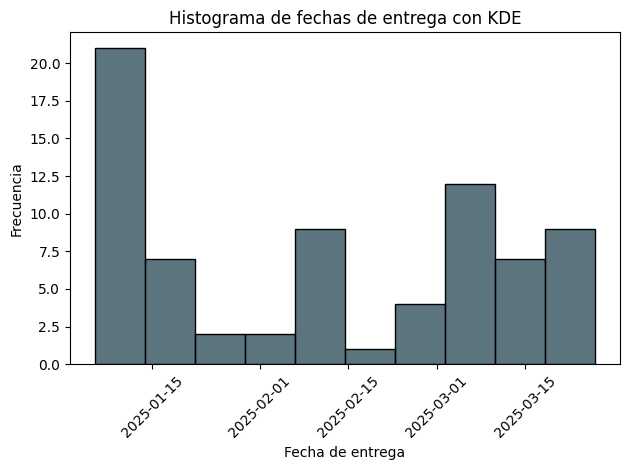

In [41]:
sns.histplot(
    data=sitio, 
    x='delivery_date', 
    bins=10, 
    #rwidth=0.9, 
    color='#264653', 
    edgecolor='black', 
    #kde=True
)

plt.xticks(rotation=45)
plt.xlabel('Fecha de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de fechas de entrega con KDE')
plt.tight_layout()
plt.show()

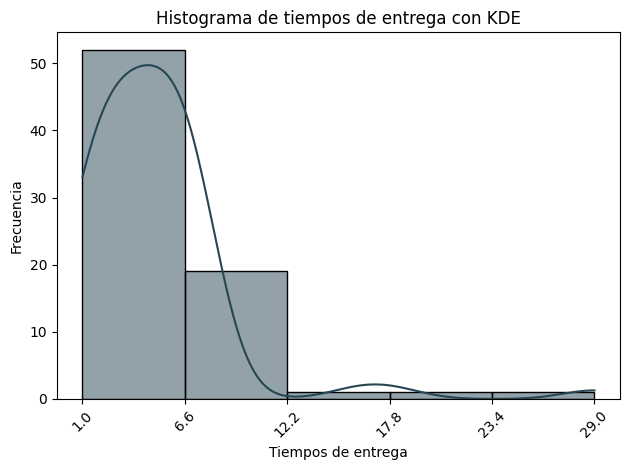

In [42]:
# Calcular los bordes de los bins
edges = np.histogram_bin_edges(sitio['delivery_time'], bins=5)

# Graficar el histograma
sns.histplot(
    data=sitio, 
    x='delivery_time', 
    bins=edges,  # usa los bordes exactos
    color='#264653', 
    edgecolor='black', 
    kde=True
)

# Ajustar los xticks para que coincidan con los bordes
plt.xticks(edges, rotation=45)
plt.xlabel('Tiempos de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de tiempos de entrega con KDE')
plt.tight_layout()
plt.show()


## Analizar los servicios realizados en el laboratorio

In [43]:
lab = temp[temp['service_location'] == 'LAB']

### An√°lisis de tendencias en los servicios de laboratorios

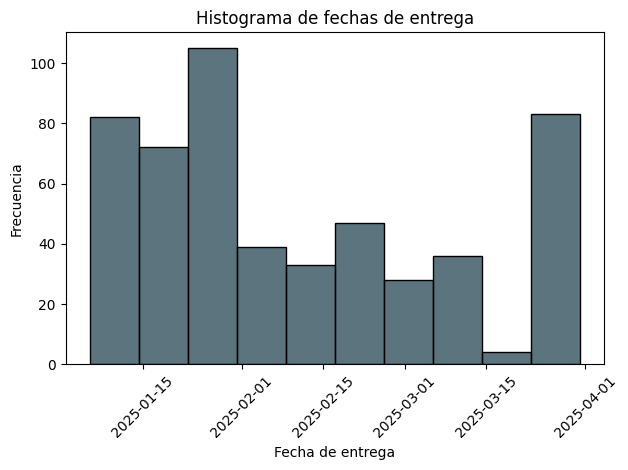

In [44]:
sns.histplot(
    data=lab, 
    x='delivery_date', 
    bins=10, 
    #rwidth=0.9, 
    color='#264653', 
    edgecolor='black', 
    #kde=True
)

plt.xticks(rotation=45)
plt.xlabel('Fecha de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de fechas de entrega')
plt.tight_layout()
plt.show()

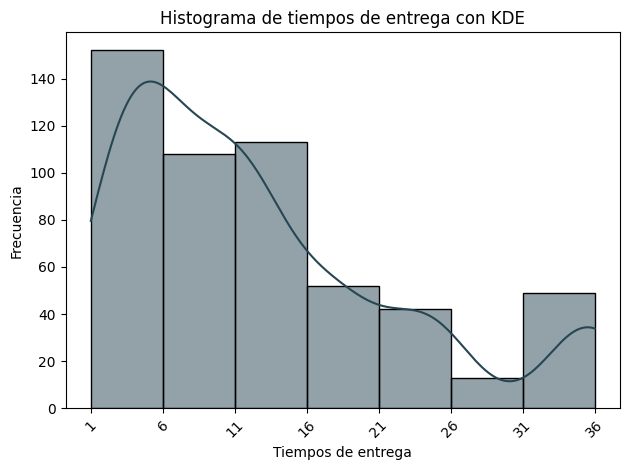

In [45]:
# Calcular los bordes de los bins
edges = np.histogram_bin_edges(lab['delivery_time'], bins=7)

# Graficar el histograma
sns.histplot(
    data=lab, 
    x='delivery_time', 
    bins=edges,  # usa los bordes exactos
    color='#264653', 
    edgecolor='black', 
    kde=True
)

# Ajustar los xticks para que coincidan con los bordes
plt.xticks(edges, rotation=45)
plt.xlabel('Tiempos de entrega')
plt.ylabel('Frecuencia')
plt.title('Histograma de tiempos de entrega con KDE')
plt.tight_layout()
plt.show()


In [46]:
#lab_trend = lab.groupby('delivery_date')['report_number'].count().reset_index()
lab_trend = lab.groupby('delivery_date')['so'].nunique().reset_index()

fig = (px.line(lab_trend, x='delivery_date', y='so', title='Cantidad de √≥rdenes de servicio por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'so': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))

'''fig = (px.line(lab_trend, x='delivery_date', y='report_number', title='Tendencia de mantenimientos por fecha de entrega',        
        labels={'delivery_date': 'Fecha de entrega', 'report_number': 'Cantidad de servicios'}, 
        width=1000, height=600, template='plotly+seaborn'))'''

fig.update_traces(
    hovertemplate='D√≠as: %{x}<br>Cantidad de servicios: %{y:.2f}',
    mode='lines+markers',
    opacity=0.8
)

# Agregar anotaciones en cada punto
for _, row in lab_trend.iterrows():
    fig.add_annotation(
        x=row['delivery_date'],  # Usar la fecha real, no el √≠ndice
        #y=row['report_number'],
        y=row['so'],
        #text=str(row['report_number']),  # Eliminar decimales
        text=str(row['so']),
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12)
    )

fig.show()

In [47]:
# Generar ambas tendencias
lab_trend_so = lab.groupby('delivery_date')['so'].nunique().reset_index()
lab_trend_report = lab.groupby('delivery_date')['report_number'].count().reset_index()
lab_trend_time = lab.groupby('delivery_date')['delivery_time'].mean().reset_index()

# Crear figura con ambas l√≠neas
fig = go.Figure()

# L√≠nea 1: Cantidad de 'so' √∫nicos
fig.add_trace(
    go.Scatter(
        x=lab_trend_so['delivery_date'],
        y=lab_trend_so['so'],
        mode='lines+markers',
        name='Servicios √önicos (SO)',
        line=dict(color='#1f77b4', width=2),
        hovertemplate='Fecha: %{x}<br>Servicios √önicos: %{y}'
    )
)

# L√≠nea 2: Cantidad de reportes
fig.add_trace(
    go.Scatter(
        x=lab_trend_report['delivery_date'],
        y=lab_trend_report['report_number'],
        mode='lines+markers',
        name='Total Servicios (Reportes)',
        line=dict(color='#ff7f0e', width=2),
        hovertemplate='Fecha: %{x}<br>Total Servicios: %{y}'
    )
)

# L√≠nea 3: Tiempo promedio
fig.add_trace(
    go.Scatter(
        x=lab_trend_time['delivery_date'],
        y=lab_trend_time['delivery_time'],
        mode='lines+markers',
        name='Tiempo promedio',
        line=dict(color='#ff1f0e', width=2),
        hovertemplate='Fecha: %{x}<br>Total Servicios: %{y}'
    )
)

# Personalizar el gr√°fico
fig.update_layout(
    title='Tendencia de mantenimientos por fecha de entrega',
    xaxis_title='Fecha de entrega',
    yaxis_title='Cantidad de servicios',
    width=1000,
    height=600,
    template='plotly+seaborn',
    legend=dict(x=0.8, y=1)  # Posici√≥n de la leyenda
)


fig.show()

In [48]:
lab['Mes'] = lab['delivery_date'].dt.month_name(locale='es_ES')

lab_per_month = (lab.groupby('Mes').agg(
    so=('so', 'nunique'),
    rep_number=('report_number', 'count'),
    avg_delv_time=('delivery_time', 'mean')
))

if 'index' not in lab_per_month.columns:
    lab_per_month.reset_index(inplace=True)
    
lab_per_month.rename(columns={'so': 'Orden de Servicio', 'rep_number': 'Cantidad de servicios', 'avg_delv_time': 'Tiempo de entrega promedio'}, inplace=True)
lab_per_month

Mes  Orden de Servicio  Cantidad de servicios  \
0    Enero                 67                    259   
1  Febrero                 61                    134   
2    Marzo                 60                    136   

   Tiempo de entrega promedio  
0                   18.621622  
1                    6.895522  
2                    7.632353

In [49]:
fig = go.Figure()

# ‚û§ L√≠nea: tiempo de entrega promedio por mes
fig.add_trace(
    go.Scatter(
        x=lab_per_month['Mes'],
        y=lab_per_month['Tiempo de entrega promedio'],
        name='Tiempo de entrega promedio',
        mode='lines+markers',
        line=dict(color='#264653', width=3),
        marker=dict(size=8),
        yaxis='y1',
        hovertemplate='Mes: %{x}<br>Promedio: %{y:.2f} d√≠as'
    )
)

# ‚û§ Barras: cantidad de servicios por mes
fig.add_trace(
    go.Bar(
        x=lab_per_month['Mes'],
        y=lab_per_month['Orden de Servicio'],
        name='Cantidad de √≥rdenes',
        marker_color='rgba(38, 70, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>√ìrdenes: %{y}'
    )
)

fig.add_trace(
    go.Bar(
        x=lab_per_month['Mes'],
        y=lab_per_month['Cantidad de servicios'],
        name='Cantidad de informes',
        marker_color='rgba(28, 170, 83, 0.4)',
        yaxis='y2',
        hovertemplate='Mes: %{x}<br>Servicios: %{y}'
    )
)


# ‚û§ Ejes
fig.update_layout(
    title='Tiempo de entrega promedio y cantidad de informes por mes',
    xaxis=dict(title='Mes'),
    yaxis=dict(
        title='Tiempo de entrega promedio (d√≠as)',
        side='left'
    ),
    yaxis2=dict(
        title='Cantidad de informes',
        overlaying='y',
        side='right',
        showgrid=False
    ),
    barmode='group',
    legend=dict(
        orientation='h', 
        x=0.51, y=0.99, 
        yanchor="bottom",
        xanchor="center",  # Centrado sobre el gr√°fico izquierdo
        bgcolor='rgba(255,255,255,0.8)'),
    width=900,
    height=800,
    template='plotly+seaborn'
)

# ‚û§ Anotaciones de los puntos de la l√≠nea
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i,
        y=row['Tiempo de entrega promedio'],
        text=f"{row['Tiempo de entrega promedio']:.2f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
# ‚û§ Anotaciones de las barras
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i+0.2,
        y=row['Cantidad de servicios'],
        text=f"{row['Cantidad de servicios']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#264653", size=12),
        yanchor="bottom"
    )
    
    # ‚û§ Anotaciones de las barras
for i, row in lab_per_month.iterrows():
    fig.add_annotation(
        x=i-0.2,
        y=row['Orden de Servicio'],
        text=f"{row['Orden de Servicio']:.0f}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=1,
        arrowcolor="#264653",
        ax=0,
        ay=-25,
        font=dict(color="#203523", size=12),
        yanchor="bottom"
    )

fig.show()


### An√°lisis por clasificaciones

In [50]:
lab_class = lab.groupby('classification')['report_number'].count().to_frame()

if 'index' not in lab_class.columns:
  lab_class.reset_index(inplace=True)
  lab_class.rename(columns={'classification': 'Clasificaci√≥n', 'report_number': 'Cantidad'}, inplace=True)

lab_class.sort_values('Cantidad', ascending=False, inplace=True)


In [51]:
lab_class

Clasificaci√≥n  Cantidad
3              TLD       446
2              RTD        36
4              TLV        33
0  ESTUDIO T√âRMICO        13
1    MANTENIMIENTO         1

In [52]:
lab.loc[lab['assignee'] == 'Omar Cristobal Cruz, Ramiro Mart√≠nez Espinosa', 'assignee'] = 'Omar Cristobal Cruz'
lab.loc[lab['assignee'] == 'David Bautista Hern√°ndez, Gerardo Ramses Arellano Bolaz', 'assignee'] = 'David Bautista Hern√°ndez'

In [53]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear subgr√°ficos
fig = make_subplots(
    rows=1, 
    cols=2,
    column_widths=[0.3, 0.6],
    vertical_spacing=0.05,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Cantidad de Certificados por Mes", "Distribuci√≥n de Servicios por Mes")
)

# Gr√°fico de Barras (con barra de color a la izquierda)
fig.add_trace(
    go.Bar(
        x=lab_class['Clasificaci√≥n'],
        y=lab_class['Cantidad'],
        text=lab_class['Cantidad'],
        width=0.4,
        marker=dict(
            color=lab_class['Cantidad'],
            colorscale='RdBu',
            colorbar=dict(
                title="Certificados",
                x=0.32,  # Posici√≥n horizontal de la barra de color
                len=0.6   # Longitud de la barra de color
            )
        ),
        hovertemplate='<b>%{x}</b><br>Cantidad: %{y}<extra></extra>',
        showlegend=False  # No mostrar leyenda para este gr√°fico
    ), 
    row=1, 
    col=1
)

# Gr√°fico de Pie (con leyenda a la derecha)
colors2 = ["#0ea3df", "#0edf7d", "#01fce5", "#ff7f0e", "#2ca02c"]

fig.add_trace(
    go.Pie(
        labels=lab_class['Clasificaci√≥n'],
        values=lab_class['Cantidad'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(
            colors=colors2
        ),
        name="Servicios",  # T√≠tulo de la leyenda
    ),
    row=1, 
    col=2
)

# Ajustar posici√≥n de leyendas y dise√±o
fig.update_layout(
    height=500,
    width=1150,  # Aumentar ancho para espacio
    template="plotly+seaborn",
    xaxis_title="Mes",
    yaxis_title="Certificados",
    legend=dict(
        x=0.87,    # Posici√≥n horizontal de la leyenda (derecha)
        y=0.5,     # Posici√≥n vertical (centro)
        traceorder="normal"
    ),
    coloraxis_colorbar=dict(
        x=0.35,    # Posici√≥n horizontal de la barra de color
        title_side="top"
    )
)

fig.show()

### Analizamos los mantenimientos teniendo en cuenta su clasificaci√≥n y la comparativa con sus tiempos asignados y de entrega.

In [54]:
# Cantidad de informes por clasificaci√≥n y asignado

lab_class_per_assignee = (lab.groupby(['classification', 'assignee'])['report_number']
                          .count()
                          .unstack()
                          .fillna(0)
                          )

# Cantidad de √≥rdenes de servicio por clasificaci√≥n y asignado

lab_class_per_assignee_so = (lab.groupby(['classification', 'assignee'])['so']
                          .nunique()
                          .unstack()
                          .fillna(0)
                          )

In [55]:
# Desempaquetar el DataFrame para obtener las columnas individuales y preparar los datos para la visualizaci√≥n
lab_class_per_assignee_melted = lab_class_per_assignee.reset_index().melt(id_vars=['classification'], var_name='assignee', value_name='0')
lab_class_per_assignee_melted.rename(columns={'classification': 'Clasificaci√≥n', 'assignee': 'Asignado a', '0': 'Cantidad'}, inplace=True)

lab_class_per_assignee_melted

Clasificaci√≥n                      Asignado a  Cantidad
0   ESTUDIO T√âRMICO        David Bautista Hern√°ndez       0.0
1     MANTENIMIENTO        David Bautista Hern√°ndez       0.0
2               RTD        David Bautista Hern√°ndez       0.0
3               TLD        David Bautista Hern√°ndez      17.0
4               TLV        David Bautista Hern√°ndez       0.0
5   ESTUDIO T√âRMICO      Dulce Mar√≠a Ram√≠rez Contla       0.0
6     MANTENIMIENTO      Dulce Mar√≠a Ram√≠rez Contla       0.0
7               RTD      Dulce Mar√≠a Ram√≠rez Contla      13.0
8               TLD      Dulce Mar√≠a Ram√≠rez Contla      33.0
9               TLV      Dulce Mar√≠a Ram√≠rez Contla       3.0
10  ESTUDIO T√âRMICO   Gerardo Ramses Arellano Bolaz       1.0
11    MANTENIMIENTO   Gerardo Ramses Arellano Bolaz       0.0
12              RTD   Gerardo Ramses Arellano Bolaz       0.0
13              TLD   Gerardo Ramses Arellano Bolaz       8.0
14              TLV   Gerardo Ramses Arellano Bolaz       0.0
15  ESTUDIO T√âRMICO  Marian Giselle Godines Nicolas       0.0
16    MANTENIMIENTO  Marian Giselle Godines Nicolas       0.0
17              RTD  Marian Giselle Godines Nicolas       0.0
18              TLD  Marian Giselle Godines Nicolas      60.0
19              TLV  Marian Giselle Godines Nicolas      17.0
20  ESTUDIO T√âRMICO       Mariela S√°nchez Vel√°zquez       0.0
21    MANTENIMIENTO       Mariela S√°nchez Vel√°zquez       0.0
22              RTD       Mariela S√°nchez Vel√°zquez       0.0
23              TLD       Mariela S√°nchez Vel√°zquez     115.0
24              TLV       Mariela S√°nchez Vel√°zquez       0.0
25  ESTUDIO T√âRMICO             Omar Cristobal Cruz       4.0
26    MANTENIMIENTO             Omar Cristobal Cruz       0.0
27              RTD             Omar Cristobal Cruz       5.0
28              TLD             Omar Cristobal Cruz      47.0
29              TLV             Omar Cristobal Cruz       6.0
30  ESTUDIO T√âRMICO        Ramiro Mart√≠nez Espinosa       0.0
31    MANTENIMIENTO        Ramiro Mart√≠nez Espinosa       1.0
32              RTD        Ramiro Mart√≠nez Espinosa       0.0
33              TLD        Ramiro Mart√≠nez Espinosa       0.0
34              TLV        Ramiro Mart√≠nez Espinosa       1.0
35  ESTUDIO T√âRMICO                Tania Nieto Lima       8.0
36    MANTENIMIENTO                Tania Nieto Lima       0.0
37              RTD                Tania Nieto Lima      18.0
38              TLD                Tania Nieto Lima     166.0
39              TLV                Tania Nieto Lima       6.0

In [56]:
# Desempaquetar el DataFrame para obtener las columnas individuales y preparar los datos para la visualizaci√≥n
lab_class_per_assignee_so_melted = lab_class_per_assignee_so.reset_index().melt(id_vars=['classification'], var_name='assignee', value_name='0')
lab_class_per_assignee_so_melted.rename(columns={'classification': 'Clasificaci√≥n', 'assignee': 'Asignado a', '0': 'Cantidad SO'}, inplace=True)

lab_class_per_assignee_so_melted

Clasificaci√≥n                      Asignado a  Cantidad SO
0   ESTUDIO T√âRMICO        David Bautista Hern√°ndez          0.0
1     MANTENIMIENTO        David Bautista Hern√°ndez          0.0
2               RTD        David Bautista Hern√°ndez          0.0
3               TLD        David Bautista Hern√°ndez          8.0
4               TLV        David Bautista Hern√°ndez          0.0
5   ESTUDIO T√âRMICO      Dulce Mar√≠a Ram√≠rez Contla          0.0
6     MANTENIMIENTO      Dulce Mar√≠a Ram√≠rez Contla          0.0
7               RTD      Dulce Mar√≠a Ram√≠rez Contla         13.0
8               TLD      Dulce Mar√≠a Ram√≠rez Contla         13.0
9               TLV      Dulce Mar√≠a Ram√≠rez Contla          2.0
10  ESTUDIO T√âRMICO   Gerardo Ramses Arellano Bolaz          1.0
11    MANTENIMIENTO   Gerardo Ramses Arellano Bolaz          0.0
12              RTD   Gerardo Ramses Arellano Bolaz          0.0
13              TLD   Gerardo Ramses Arellano Bolaz          8.0
14              TLV   Gerardo Ramses Arellano Bolaz          0.0
15  ESTUDIO T√âRMICO  Marian Giselle Godines Nicolas          0.0
16    MANTENIMIENTO  Marian Giselle Godines Nicolas          0.0
17              RTD  Marian Giselle Godines Nicolas          0.0
18              TLD  Marian Giselle Godines Nicolas         28.0
19              TLV  Marian Giselle Godines Nicolas          6.0
20  ESTUDIO T√âRMICO       Mariela S√°nchez Vel√°zquez          0.0
21    MANTENIMIENTO       Mariela S√°nchez Vel√°zquez          0.0
22              RTD       Mariela S√°nchez Vel√°zquez          0.0
23              TLD       Mariela S√°nchez Vel√°zquez         18.0
24              TLV       Mariela S√°nchez Vel√°zquez          0.0
25  ESTUDIO T√âRMICO             Omar Cristobal Cruz          4.0
26    MANTENIMIENTO             Omar Cristobal Cruz          0.0
27              RTD             Omar Cristobal Cruz          5.0
28              TLD             Omar Cristobal Cruz         18.0
29              TLV             Omar Cristobal Cruz          4.0
30  ESTUDIO T√âRMICO        Ramiro Mart√≠nez Espinosa          0.0
31    MANTENIMIENTO        Ramiro Mart√≠nez Espinosa          1.0
32              RTD        Ramiro Mart√≠nez Espinosa          0.0
33              TLD        Ramiro Mart√≠nez Espinosa          0.0
34              TLV        Ramiro Mart√≠nez Espinosa          1.0
35  ESTUDIO T√âRMICO                Tania Nieto Lima          7.0
36    MANTENIMIENTO                Tania Nieto Lima          0.0
37              RTD                Tania Nieto Lima         17.0
38              TLD                Tania Nieto Lima         32.0
39              TLV                Tania Nieto Lima          5.0

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Filtrar valores > 0
lab_filtrado = lab_class_per_assignee_melted[lab_class_per_assignee_melted['Cantidad'] > 0]
lab_filtrado_so = lab_class_per_assignee_so_melted[lab_class_per_assignee_so_melted['Cantidad SO'] > 0]

# Colores fijos por persona
colores = px.colors.qualitative.Plotly
personas = sorted(lab_filtrado['Asignado a'].unique())
color_map = {persona: colores[i % len(colores)] for i, persona in enumerate(personas)}

# Crear figura con subplots
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,
    column_widths=[0.5, 0.5],
    subplot_titles=("Informes por clasificaci√≥n", "√ìrdenes de Servicio por clasificaci√≥n")
)

# Gr√°fico 1: Informes
for nombre in personas:
    df_temp = lab_filtrado[lab_filtrado['Asignado a'] == nombre]
    fig.add_trace(
        go.Bar(
            x=df_temp['Clasificaci√≥n'],
            y=df_temp['Cantidad'],
            name=nombre,
            text=df_temp['Cantidad'],
            textposition='outside',
            marker_color=color_map[nombre]
        ),
        row=1, col=1
    )

# Gr√°fico 2: √ìrdenes de Servicio
for nombre in personas:
    df_temp = lab_filtrado_so[lab_filtrado_so['Asignado a'] == nombre]
    fig.add_trace(
        go.Bar(
            x=df_temp['Clasificaci√≥n'],
            y=df_temp['Cantidad SO'],
            name=nombre,
            text=df_temp['Cantidad SO'],
            textposition='outside',
            marker_color=color_map[nombre],
            showlegend=False  # Evita duplicar la leyenda
        ),
        row=1, col=2
    )

fig.update_layout(
    #title="Servicios por clasificaci√≥n y asignado",
    legend_title='Asignado a',
    barmode='group',
    bargap=0.2,
    height=800,
    width=1150,
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.1,
        xanchor='center',
        x=0.5
    )
)

# T√≠tulos individuales de los ejes X (porque son subplots)
fig.update_xaxes(title_text='Clasificaci√≥n', row=1, col=1)
fig.update_xaxes(title_text='Clasificaci√≥n', row=1, col=2)

# T√≠tulo eje Y (es compartido)
fig.update_yaxes(title_text='Cantidad', row=1, col=1)

fig.show()


In [58]:
df1 = maint.reset_index().sort_values('total_pieces', ascending=False)
df2 = maintenance_time.reset_index().sort_values('assigned_time', ascending=False)

# Crear figura con 1 fila y 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"secondary_y": True}, {"secondary_y": True}]],
    column_widths=[0.5, 0.5],
    horizontal_spacing=0.1,
    subplot_titles=(
        "Comparaci√≥n de reportes y piezas", 
        "Tiempo de entrega vs tiempo asignado"
    )
)

# ==============================================
# PRIMER GR√ÅFICO (IZQUIERDA)
# ==============================================
# Barras para cantidad de reportes
fig.add_trace(
    go.Bar(
        x=df1['classification'],
        y=df1['rep_qty'],
        name='Reportes',
        marker_color='#66b3ff',
        text=[f'{val:.0f}' for val in df1['rep_qty']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Reportes:</b> %{y:.0f}<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=False
)

# Barras para cantidad de piezas
fig.add_trace(
    go.Bar(
        x=df1['classification'],
        y=df1['total_pieces'],
        name='Piezas',
        marker_color='#99ff99',
        text=[f'{val:.0f}' for val in df1['total_pieces']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Piezas:</b> %{y:.0f}<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=False
)

# L√≠nea para tiempo de entrega promedio
fig.add_trace(
    go.Scatter(
        x=df1['classification'],
        y=df1['deliv_time_avg'],
        mode='lines+markers',
        name='Tiempo Entrega',
        line=dict(color='black', dash='dash'),
        marker=dict(symbol='circle', size=8),
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Tiempo:</b> %{y:.1f} d√≠as<extra></extra>'
        )
    ),
    row=1, col=1, secondary_y=True
)

# ==============================================
# SEGUNDO GR√ÅFICO (DERECHA)
# ==============================================
# Barras tiempo de entrega
fig.add_trace(
    go.Bar(
        x=df2['classification'],
        y=df2['delivery_time'],
        name='Entrega',
        marker_color='#0e56cd',
        text=[f'{val:.1f}' for val in df2['delivery_time']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Tiempo Entrega:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=False
)

# Barras tiempo asignado
fig.add_trace(
    go.Bar(
        x=df2['classification'],
        y=df2['assigned_time'],
        name='Asignado',
        marker_color='#21c321',
        text=[f'{val:.1f}' for val in df2['assigned_time']],
        textposition='outside',
        width=0.4,
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Tiempo Asignado:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=False
)

# L√≠nea promedio de piezas
fig.add_trace(
    go.Scatter(
        x=df2['classification'],
        y=df2['piece_count'],
        mode='lines+markers',
        name='Piezas',
        line=dict(color='black', dash='dot'),
        marker=dict(symbol='diamond', size=8),
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>'
            '<b>Promedio Piezas:</b> %{y:.1f}<extra></extra>'
        )
    ),
    row=1, col=2, secondary_y=True
)

# ==============================================
# ANOTACIONES PARA RAZONES
# ==============================================
annotations = []
for i, row in df1.iterrows():
    if row['rep_qty'] > 0:  # Evitar divisi√≥n por cero
        ratio = row['total_pieces'] / row['rep_qty']
        if ratio > 1:
            annotations.append(dict(
                x=row['classification'],
                y=max(row['rep_qty'], row['total_pieces']),
                xref="x1",
                yref="y1",
                text=f'Raz√≥n: {ratio:.2f}',
                showarrow=True,
                arrowhead=3,
                font=dict(color='red'),
                ax=20,
                ay=-30
            ))

# ==============================================
# CONFIGURACI√ìN FINAL
# ==============================================
fig.update_layout(
    height=600,
    width=1200,
    barmode='group',
    annotations=annotations,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.1,
        xanchor="center",
        x=0.5
    ),
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Arial"
    ),
    margin=dict(t=100, b=150),  # Margen aumentado para ejes
    xaxis=dict(tickangle=-30),  # Inclinaci√≥n etiquetas eje X
    xaxis2=dict(tickangle=-30)  # Inclinaci√≥n para segundo gr√°fico
)

# Configurar ejes X
fig.update_xaxes(
    title_text="Clasificaci√≥n del Equipo",
    showticklabels=True,
    row=1, 
    col=1,
    tickfont=dict(size=12)
)

fig.update_xaxes(
    title_text="Clasificaci√≥n del Equipo",
    showticklabels=True,
    row=1, 
    col=2,
    tickfont=dict(size=12)
)

# Configurar ejes Y
fig.update_yaxes(title_text="Cantidad", secondary_y=False, row=1, col=1)
fig.update_yaxes(title_text="Tiempo (d√≠as)", secondary_y=True, row=1, col=1)
fig.update_yaxes(title_text="Tiempo", secondary_y=False, row=1, col=2)
fig.update_yaxes(title_text="Piezas", secondary_y=True, row=1, col=2)

# T√≠tulo general
fig.add_annotation(
    text="An√°lisis de Mantenimientos",
    xref="paper",
    yref="paper",
    x=0.5,
    y=1.25,
    showarrow=False,
    font=dict(size=20, color='black')
)

fig.show()

NameError: name 'maint' is not defined

## ‚úÖ Eficiencia en los Tiempos de Entrega

- En la mayor√≠a de los casos, se completan los servicios de mantenimiento en un tiempo considerablemente menor al que se les asigna.  
- Esto indica que el laboratorio opera con holgura en su planificaci√≥n, lo cual puede verse como una oportunidad para **optimizar los tiempos asignados y mejorar la eficiencia operativa**.  
- Reducir los m√°rgenes conservadores en la planificaci√≥n puede liberar recursos y permitir una mayor capacidad de atenci√≥n.

---

## ‚úÖ An√°lisis por Categor√≠a de Pesas: M1 y M2

- **M1:**  
  - Es la categor√≠a con mayor n√∫mero de informes (61), representando una alta demanda.  
  - En promedio, cada informe incluye unas **2.46 pesas**, lo que sugiere que se manejan vol√∫menes moderados por servicio.  
  - Esto permite una atenci√≥n √°gil y constante por parte del personal t√©cnico.

- **M2:**  
  - Aunque tiene menos informes, cada uno involucra un volumen considerablemente mayor, con un **promedio de 12.80 pesas por servicio**.  
  - Este comportamiento sugiere una mayor complejidad t√©cnica, que justifica los tiempos asignados.  
  - Aun as√≠, los tiempos reales de entrega no se ven comprometidos, lo cual demuestra **una buena capacidad de respuesta ante solicitudes m√°s complejas**.

---

## ‚úÖ Oportunidades de Mejora en la Planificaci√≥n

- Dado que el tiempo efectivo es consistentemente menor que el tiempo asignado, **se evidencia una subutilizaci√≥n de recursos**.  
- Esto abre la puerta a una redistribuci√≥n m√°s eficiente del personal o a la **posibilidad de atender m√°s √≥rdenes sin comprometer la calidad**.  
- Ajustar los tiempos asignados a la realidad observada contribuir√≠a a una planificaci√≥n m√°s precisa y menos conservadora.

---

## üí° Recomendaciones Estrat√©gicas

1. **Revisar los Tiempos Asignados por Tipo de Categor√≠a:**  
   Evaluar si es viable reducirlos para mejorar la rotaci√≥n de servicios.

2. **Analizar la Relaci√≥n entre Volumen de Pesas y Tiempo de Entrega:**  
   Confirmar si el n√∫mero de pesas enviadas por los clientes influye significativamente en el desempe√±o del laboratorio, principalmente con los servicios de calibraci√≥n.

3. **Centralizar Procesos en Casos de Alta Carga (como M2):**  
   Dado que estas √≥rdenes manejan muchas pesas, podr√≠a ser √∫til desarrollar flujos especializados para mantener la eficiencia.

4. **Monitoreo Continuo de Indicadores Operativos:**  
   Implementar dashboards o reportes peri√≥dicos para vigilar tiempos de entrega y carga de trabajo por categor√≠a.

---

## üìå Conclusi√≥n General

El laboratorio de calibraci√≥n de masa muestra una **alta eficiencia operativa**, cumpliendo los servicios en menos tiempo del previsto incluso cuando se manejan grandes vol√∫menes de pesas por informe. A pesar de las diferencias en complejidad entre categor√≠as, los tiempos de entrega se mantienen estables. Existe margen para **ajustar la planificaci√≥n y aumentar la productividad sin comprometer la calidad del servicio**.


# Realizar el an√°lisis de las calibraciones

### Eliminamos todos los reportes que no son calibraciones

In [ ]:
# Se eliminan las filas que no son calibraciones
mass_cal = mass[~mass['report_number'].str.startswith('RSM', na=False)]

In [ ]:
# Analizamos la informaci√≥n de la tabla
mass_cal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 388 entries, 0 to 387
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            388 non-null    object        
 1   so                       388 non-null    object        
 2   assignee                 388 non-null    object        
 3   calibrator               388 non-null    object        
 4   supervisor               388 non-null    object        
 5   approver                 388 non-null    object        
 6   classification           388 non-null    object        
 7   lab_received_date        388 non-null    datetime64[ns]
 8   scheduled_delivery_date  383 non-null    datetime64[ns]
 9   cleaning_date            382 non-null    datetime64[ns]
 10  calibration_date         388 non-null    datetime64[ns]
 11  delivery_date            388 non-null    datetime64[ns]
 12  delivery_time            388 non-null    

In [ ]:
mass_cal.isnull().sum()

report_number                0
so                           0
assignee                     0
calibrator                   0
supervisor                   0
approver                     0
classification               0
lab_received_date            0
scheduled_delivery_date      5
cleaning_date                6
calibration_date             0
delivery_date                0
delivery_time                0
process_status               0
assigned_time                0
service_location             0
substitution_reason        365
lab_observations           337
priority                     0
piece_count                  0
year_received                0
month_received               0
week_received                0
year_delivery                0
month_delivery               0
week_delivery                0
service_type                 0
equipment_type               0
dtype: int64

# An√°lisis del DataFrame

**üìå Estructura General**  
- **386 registros** | **28 columnas** 
**üîç Hallazgos Clave**  
1. **Variables Temporales** (completas en su mayor√≠a):  
   - `delivery_time` (tiempo de entrega) y `assigned_time` - **0 nulos**  
   - Fechas cr√≠ticas (`lab_received_date`, `calibration_date`, `delivery_date`) - **100% completas**  
   - `scheduled_delivery_date` y `cleaning_date` - **5-6 nulos**  

2. **Columnas con Datos Faltantes**:  
   - `substitution_reason` (94% nulos) y `lab_observations` (87% nulos) - **Considerar eliminar o imputar**  

3. **Variables Categ√≥ricas Relevantes**:  
   - `classification`, `priority`, `service_type`, `equipment_type` - **0 nulos**  
   - √ötiles para segmentaci√≥n (ej: an√°lisis por tipo de equipo o prioridad).  

**‚ö†Ô∏è Siguientes acciones**  
- Limpieza m√≠nima: Revisar filas con `scheduled_delivery_date` nulo.  
- Enfoque anal√≠tico: **`delivery_time` vs categor√≠as** (prioridad, tipo de servicio).  
- Columnas opcionales: `substitution_reason` y `lab_observations` aportan poco valor.  


# An√°lisis de los errores de sustituci√≥n antes de realizar el an√°lisis de las calibraciones

In [ ]:
# Obtenemos la cantidad de reportes por cada raz√≥n de sustituci√≥n
subs_reason = mass_cal.groupby('substitution_reason')['report_number'].count().sort_values(ascending=False)
subs_reason


substitution_reason
Solicitud del cliente           14
Error de laboratorio             6
Error del √°rea comercial         2
Error de atenci√≥n al cliente     1
Name: report_number, dtype: int64

### Se comparan los distintos tipos de errores de sustituci√≥n

In [ ]:
import plotly.express as px

# Asumimos que subs_reason ya est√° definido
# Calcular el total de sustituciones
total = len(mass_cal['report_number'].unique())

# Calcular los porcentajes
percentages = [(v / total) * 100 for v in subs_reason.values]

# Creamos el gr√°fico de barras horizontales con la misma est√©tica
fig = px.bar(
    subs_reason,
    x=subs_reason.values,
    y=subs_reason.index,
    orientation='h',
    color=subs_reason.values,  # Esto activa el gradiente
    color_continuous_scale=['#2ca25f', '#66c2a4', '#41b6c4', '#2b8cbe'],  # Escala de verde a azul
    title='Razones de sustituci√≥n por tipo'
)

# Configurar el dise√±o para que sea id√©ntico al de la imagen
fig.update_layout(
    width=800,
    height=500,
    xaxis_title='Cantidad de sustituciones',
    yaxis_title='Tipo de sustituci√≥n',
    plot_bgcolor='white',
    margin=dict(l=150, r=50, t=80, b=80),
    coloraxis_colorbar=dict(
        title='Cantidad',
        len=0.8
    )
)

# Eliminar las anotaciones autom√°ticas de valores si existen
fig.update_traces(texttemplate='', hovertemplate='<b>%{y}</b><br>Cantidad: %{x}<extra></extra>')  # Formato del hover)

# A√±adir solo los porcentajes donde est√°n los c√≠rculos rojos
for i, (valor, porcentaje) in enumerate(zip(subs_reason.values, percentages)):
    fig.add_annotation(
        x=valor + 0.5,
        y=i,
        text=f"{porcentaje:.1f}%",  # Solo el porcentaje con un decimal
        showarrow=False,
        font=dict(size=12),
        xanchor="center",
        yanchor="middle"
    )

# Mostrar el gr√°fico
fig.show()

# An√°lisis de Sustituciones en Masa

**üìä Porcentaje de sustituciones**:
- **Total de sustituciones**: 6.39% del total de informes de calibraciones.

**üìä Distribuci√≥n de Causas**:
- **Principal motivo**: Solicitud del cliente (3.80% del total de informes de calibraciones (m√°ximo))
- **Errores menores**: 
  - √Årea de atenci√≥n al cliente (m√°x 0.27% del total de informes de calibraciones) 


1. **Prioridad de Acci√≥n**:
   - Enfocarse en **solicitudes de clientes** (frecuencia alta).


**üìå Recomendaci√≥n**: **Las razones de sustituci√≥n por solicitudes del cliente puede indicar que falta claridad al momento de captar los requerimientos que el cliente necesita, por lo que se recomienda optimizar el proceso en cuesti√≥n.**

## Tipos de errores vs Clasificaci√≥n de equipo

In [ ]:
# 1. Crear una copia del DataFrame para preservar los datos originales
df_temp = mass_cal.copy()

# 2. Identificar errores no clasificados (NaN)
df_temp['classification'] = df_temp['classification'].fillna('No clasificado')  # Renombrar NaN

# 3. Agrupar incluyendo la nueva categor√≠a
errores_por_classification = (
    df_temp.groupby(['classification', 'substitution_reason'])
        .size()
        .unstack(fill_value=0)
        .reset_index()
)

# 4. Calcular el TOTAL correcto (suma de razones)
columnas_errores = errores_por_classification.columns.difference(['classification'])
errores_por_classification['Total'] = errores_por_classification[columnas_errores].sum(axis=1)

# 5. Ordenar y mostrar
errores_por_classification = errores_por_classification.sort_values('Total', ascending=False)
errores_por_classification

substitution_reason classification  Error de atenci√≥n al cliente  \
0                               E2                             1   
1                               F1                             0   
2                               M2                             0   

substitution_reason  Error de laboratorio  Error del √°rea comercial  \
0                                       3                         2   
1                                       3                         0   
2                                       0                         0   

substitution_reason  Solicitud del cliente  Total  
0                                        7     13  
1                                        5      8  
2                                        2      2

In [ ]:
epc = errores_por_classification.drop(columns='Total', errors='ignore')
errores_por_classification_melted = epc.melt(
    id_vars=['classification'],
    var_name='Motivo de sustituci√≥n',
    value_name='Cantidad'   
)
errores_por_classification_melted

classification         Motivo de sustituci√≥n  Cantidad
0              E2  Error de atenci√≥n al cliente         1
1              F1  Error de atenci√≥n al cliente         0
2              M2  Error de atenci√≥n al cliente         0
3              E2          Error de laboratorio         3
4              F1          Error de laboratorio         3
5              M2          Error de laboratorio         0
6              E2      Error del √°rea comercial         2
7              F1      Error del √°rea comercial         0
8              M2      Error del √°rea comercial         0
9              E2         Solicitud del cliente         7
10             F1         Solicitud del cliente         5
11             M2         Solicitud del cliente         2

### Se comparan los distintos tipos de errores de sustituci√≥n por clasificaci√≥n de equipo

In [ ]:
# Total por clasificaci√≥n para el gr√°fico de pastel
totales_por_clasificacion = errores_por_classification_melted.groupby('classification')['Cantidad'].sum().reset_index()

# Datos agrupados para la barra apilada
df_bar = errores_por_classification_melted.groupby(['classification', 'Motivo de sustituci√≥n'])['Cantidad'].sum().reset_index()

# Paleta personalizada de 4 colores en tonos verdiazules
color_sequence = ['#2ca25f', '#66c2a4', '#41b6c4', '#2b8cbe']

# Obtener los motivos de sustituci√≥n
motivos = df_bar['Motivo de sustituci√≥n'].unique()

# Asignar un color a cada motivo (si hay m√°s motivos que colores, se ciclar√° la paleta)
color_dict = {motivo: color_sequence[i % len(color_sequence)] for i, motivo in enumerate(motivos)}

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=("Distribuci√≥n de errores por clasificaci√≥n", "Errores por motivo de sustituci√≥n")
)

# ----- Agregar Gr√°fico de Pastel -----
fig.add_trace(go.Pie(
    labels=totales_por_clasificacion['classification'],
    values=totales_por_clasificacion['Cantidad'],
    hole=0.3,
    marker=dict(
        # Asigna colores a cada clasificaci√≥n a partir de la paleta (se utiliza el mismo orden de la paleta)
        colors=[color_sequence[i % len(color_sequence)] for i in range(len(totales_por_clasificacion))]
    ),
    hovertemplate=(
        '<b>Clasificaci√≥n:</b> %{label}<br>' +
        '<b>Total Errores:</b> %{value}<br>' +
        '<b>Porcentaje:</b> %{percent:.1%}<extra></extra>'
    ),
    textinfo='percent',
    textposition='outside',
    showlegend=True
), row=1, col=1)

# ----- Agregar Gr√°fico de Barras Apiladas -----
for motivo in motivos:
    df_filtrado = df_bar[df_bar['Motivo de sustituci√≥n'] == motivo]
    fig.add_trace(go.Bar(
        x=df_filtrado['classification'],
        y=df_filtrado['Cantidad'],
        name=motivo,
        marker_color=color_dict[motivo],
        hovertemplate=(
            '<b>Clasificaci√≥n:</b> %{x}<br>' +
            f'<b>Motivo:</b> {motivo}<br>' +
            '<b>Cantidad:</b> %{y}<extra></extra>'
        ),
    ), row=1, col=2)

# ----- Actualizar Layout General -----
fig.update_layout(
    barmode='stack',
    title_text="An√°lisis de Errores por Clasificaci√≥n y Motivo de Sustituci√≥n",
    template='seaborn',
    height=500,
    width=1000,
    # Posicionar la leyenda para que se muestre completa
    legend=dict(
        title_text='<b>Leyenda Completa</b>',
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        traceorder='normal'
    ),
    margin=dict(r=300)
)

fig.show()


## üìå Hallazgo Principal
**Las pesas E2 son la clasificaci√≥n m√°s cr√≠tica**, representando:
- **13 sustituciones totales** (entre ellas 7 por solicitud del cliente y 3 por errores de laboratorio)
- Esto equivale al **56.52% del total de sustituciones** 

### Clasificaci√≥n por metr√≥logo y tipos de errores

In [ ]:
# Agrupar por 'assignee' y contar errores por tipo de 'substitution_reason'
errores_por_assignee = (
    mass_cal.groupby(['assignee', 'substitution_reason'])  # Agrupar por persona y tipo de error
        .size()                                   # Contar ocurrencias
        .unstack(fill_value=0)                    # Convertir a formato tabla
        .reset_index()                            # Convertir √≠ndice a columna
)

# Ordenar por el total de errores (opcional)
errores_por_assignee['Total'] = errores_por_assignee.count(axis=1)
errores_por_assignee = errores_por_assignee.sort_values('Total', ascending=False).drop('Total', axis=1)

# Mostrar resultado
errores_por_assignee

substitution_reason                            assignee  \
0                             Eva Mar√≠a Ar√©valo Jim√©nez   
1                              Francisco Torres Cabrera   
2                              Gabriel Gallardo Camacho   
3                                Guillermo Guzm√°n L√≥pez   
4                    Leobardo Maximiliano Brito Fonseca   
5                                 Mario de Jes√∫s Garc√≠a   

substitution_reason  Error de atenci√≥n al cliente  Error de laboratorio  \
0                                               1                     0   
1                                               0                     3   
2                                               0                     0   
3                                               0                     0   
4                                               0                     2   
5                                               0                     1   

substitution_reason  Error del √°rea comercial  Solicitud del cliente  
0                                           0                      8  
1                                           1                      0  
2                                           0                      2  
3                                           0                      2  
4                                           1                      0  
5                                           0                      2

In [ ]:
errores_por_assignee_melted = errores_por_assignee.melt(id_vars='assignee', value_vars=['Error de atenci√≥n al cliente', 'Error de laboratorio', 'Error del √°rea comercial', 'Solicitud del cliente'], var_name='Motivo de sustituci√≥n', value_name='Cantidad')
errores_por_assignee_melted

assignee         Motivo de sustituci√≥n  Cantidad
0            Eva Mar√≠a Ar√©valo Jim√©nez  Error de atenci√≥n al cliente         1
1             Francisco Torres Cabrera  Error de atenci√≥n al cliente         0
2             Gabriel Gallardo Camacho  Error de atenci√≥n al cliente         0
3               Guillermo Guzm√°n L√≥pez  Error de atenci√≥n al cliente         0
4   Leobardo Maximiliano Brito Fonseca  Error de atenci√≥n al cliente         0
5                Mario de Jes√∫s Garc√≠a  Error de atenci√≥n al cliente         0
6            Eva Mar√≠a Ar√©valo Jim√©nez          Error de laboratorio         0
7             Francisco Torres Cabrera          Error de laboratorio         3
8             Gabriel Gallardo Camacho          Error de laboratorio         0
9               Guillermo Guzm√°n L√≥pez          Error de laboratorio         0
10  Leobardo Maximiliano Brito Fonseca          Error de laboratorio         2
11               Mario de Jes√∫s Garc√≠a          Error de laboratorio         1
12           Eva Mar√≠a Ar√©valo Jim√©nez      Error del √°rea comercial         0
13            Francisco Torres Cabrera      Error del √°rea comercial         1
14            Gabriel Gallardo Camacho      Error del √°rea comercial         0
15              Guillermo Guzm√°n L√≥pez      Error del √°rea comercial         0
16  Leobardo Maximiliano Brito Fonseca      Error del √°rea comercial         1
17               Mario de Jes√∫s Garc√≠a      Error del √°rea comercial         0
18           Eva Mar√≠a Ar√©valo Jim√©nez         Solicitud del cliente         8
19            Francisco Torres Cabrera         Solicitud del cliente         0
20            Gabriel Gallardo Camacho         Solicitud del cliente         2
21              Guillermo Guzm√°n L√≥pez         Solicitud del cliente         2
22  Leobardo Maximiliano Brito Fonseca         Solicitud del cliente         0
23               Mario de Jes√∫s Garc√≠a         Solicitud del cliente         2

In [ ]:
# Total por clasificaci√≥n para el gr√°fico de pastel
totales_por_asignado = errores_por_assignee_melted.groupby('Motivo de sustituci√≥n')['Cantidad'].sum().reset_index()

# Datos agrupados para la barra apilada
df_bar = errores_por_assignee_melted.groupby(['assignee', 'Motivo de sustituci√≥n'])['Cantidad'].sum().reset_index()

# Paleta personalizada de 4 colores en tonos verdiazules
color_sequence = ['#2ca25f', '#f1290d', '#41b6c4', '#2b8cbe']

# Obtener los motivos de sustituci√≥n
motivos = df_bar['Motivo de sustituci√≥n'].unique()

# Asignar un color a cada motivo (si hay m√°s motivos que colores, se ciclar√° la paleta)
color_dict = {motivo: color_sequence[i % len(color_sequence)] for i, motivo in enumerate(motivos)}

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.4, 0.6],
    specs=[[{"type": "domain"}, {"type": "xy"}]],
    subplot_titles=("Motivos de sustituci√≥n de informes", "Distribuci√≥nn de sustituciones por metr√≥logo")
)

# ----- Agregar Gr√°fico de Pastel -----
fig.add_trace(go.Pie(
    labels=totales_por_asignado['Motivo de sustituci√≥n'],
    values=totales_por_asignado['Cantidad'],
    pull=[0, 0.1, 0, 0],
    hole=0.3,
    marker=dict(
        # Asigna colores a cada clasificaci√≥n a partir de la paleta (se utiliza el mismo orden de la paleta)
        colors=[color_sequence[i % len(color_sequence)] for i in range(len(totales_por_clasificacion))]
    ),
    hovertemplate=(
        '<b>Clasificaci√≥n:</b> %{label}<br>' +
        '<b>Total Errores:</b> %{value}<br>' +
        '<b>Porcentaje:</b> %{percent:.1%}<extra></extra>'
    ),
    textinfo='percent',
    textposition='outside',
    showlegend=True
), row=1, col=1)

# ----- Agregar Gr√°fico de Barras Apiladas -----
for motivo in motivos:
    df_filtrado = df_bar[df_bar['Motivo de sustituci√≥n'] == motivo]
    fig.add_trace(go.Bar(
        x=df_filtrado['assignee'],
        y=df_filtrado['Cantidad'],
        name=motivo,
        marker_color=color_dict[motivo],
        hovertemplate=(
            '<b>Metr√≥logo:</b> %{x}<br>' +
            f'<b>Motivo:</b> {motivo}<br>' +
            '<b>Cantidad:</b> %{y}<extra></extra>'
        ),
    ), row=1, col=2)

# ----- Actualizar Layout General -----
fig.update_layout(
    barmode='stack',
    title_text="Sustituci√≥n de informes por metr√≥logos y motivos",
    template='seaborn',
    height=500,
    width=1000,
    # Posicionar la leyenda para que se muestre completa
    legend=dict(
        title_text='<b>Leyenda Completa</b>',
        yanchor="top",
        y=0.95,
        xanchor="left",
        x=1.02,
        traceorder='normal'
    ),
    margin=dict(r=300)
)

fig.show()


# Resumen: An√°lisis de Errores por Clasificaci√≥n y Motivo de Sustituci√≥n

## Distribuci√≥n General  
- **60.9%**: Solicitud del cliente (principal motivo)  
- **26.1%**: Error de laboratorio  
- **8.7%**: Error del √°rea comercial  
- **4.35%**: Error de atenci√≥n al cliente  

## An√°lisis por Personal  
En lo que al laboratorio concierne, las sustituciones que impactan en la calibraci√≥n por parte del laboratorio son las "Sustituciones por error del laboratorio", estas se reparten de la siguiente forma:
- **Francisco Torres Cabrera**: 3 errores
- **Leobardo Maximiliano Brito Fonseca**: 2 errores
- **Mario de Jes√∫s Garc√≠a**: 1 error

## Recomendaciones
- Mejorar proceso de toma de requisitos iniciales con clientes  
- Implementar medidas correctivas en laboratorio (26.1% de errores)  
- Proporcionar capacitaci√≥n espec√≠fica al personal seg√∫n sus patrones de error  

#### Eliminar las filas que contienen los informes que corresponden a las sustituciones por errores

In [ ]:
# Eliminar las filas que contienen errores de sustituci√≥n
mass_sin_errores = df_temp.drop(df_temp[df_temp['substitution_reason'].notna()].index, errors='ignore')

In [ ]:
mass_sin_errores = mass_sin_errores.drop(columns=['substitution_reason'], errors='ignore')
mass_sin_errores.head(10)

report_number     so                            assignee  \
0     CCM0001.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
1     CCM0002.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
2     CCM0003.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
3     CCM0004.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
4  CCM0005.M/2025 v0  I0082  Leobardo Maximiliano Brito Fonseca   
5  CCM0005.M/2025 v1  H2381  Leobardo Maximiliano Brito Fonseca   
6     CCM0006.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
7     CCM0007.M/2025  H2395            Francisco Torres Cabrera   
8     CCM0008.M/2025  H2403              Guillermo Guzm√°n L√≥pez   
9     CCM0009.M/2025  H2403              Guillermo Guzm√°n L√≥pez   

                           calibrator                          supervisor  \
0  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
1  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
2  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
3  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
4  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
5  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
6  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
7            Francisco Torres Cabrera  Leobardo Maximiliano Brito Fonseca   
8              Guillermo Guzm√°n L√≥pez  Leobardo Maximiliano Brito Fonseca   
9              Guillermo Guzm√°n L√≥pez  Leobardo Maximiliano Brito Fonseca   

                             approver classification lab_received_date  \
0            Gabriel Gallardo Camacho             E2        2024-12-05   
1            Gabriel Gallardo Camacho             E2        2024-12-05   
2            Gabriel Gallardo Camacho             E2        2024-12-05   
3            Gabriel Gallardo Camacho             E2        2024-12-05   
4            Gabriel Gallardo Camacho             E2        2025-01-21   
5            Gabriel Gallardo Camacho             E2        2024-12-05   
6            Gabriel Gallardo Camacho             E2        2024-12-05   
7  Leobardo Maximiliano Brito Fonseca             E2        2024-12-06   
8  Leobardo Maximiliano Brito Fonseca             M1        2024-12-09   
9  Leobardo Maximiliano Brito Fonseca             M1        2024-12-09   

  scheduled_delivery_date cleaning_date  ...   priority piece_count  \
0              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
1              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
2              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
3              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
4              2025-01-31    2025-01-21  ...  ORDINARIO         1.0   
5              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
6              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
7              2025-01-08    2024-12-06  ...  ORDINARIO        22.0   
8              2025-01-06    2025-01-02  ...  ORDINARIO         4.0   
9              2025-01-06    2025-01-02  ...  ORDINARIO         3.0   

   year_received month_received  week_received year_delivery month_delivery  \
0           2024             12             49          2025              1   
1           2024             12             49          2025              1   
2           2024             12             49          2025              1   
3           2024             12             49          2025              1   
4           2025              1              4          2025              1   
5           2024             12             49          2025              1   
6           2024             12             49          2025              1   
7           2024             12             49          2025              1   
8           2024             12             50          2025              1   
9           2024          

In [ ]:
mass_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 387
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            365 non-null    object        
 1   so                       365 non-null    object        
 2   assignee                 365 non-null    object        
 3   calibrator               365 non-null    object        
 4   supervisor               365 non-null    object        
 5   approver                 365 non-null    object        
 6   classification           365 non-null    object        
 7   lab_received_date        365 non-null    datetime64[ns]
 8   scheduled_delivery_date  360 non-null    datetime64[ns]
 9   cleaning_date            359 non-null    datetime64[ns]
 10  calibration_date         365 non-null    datetime64[ns]
 11  delivery_date            365 non-null    datetime64[ns]
 12  delivery_time            365 non-null    

In [ ]:
# Eliminamos las columnas que no son necesarias
mass_sin_errores = mass_sin_errores.drop(columns=['substitution_reason', 'service_type', 'lab_observations', 'process_status'], errors='ignore')

# Verificamos nuevamente los tipos de datos de cada columna y la cantidad de datos nulos
mass_sin_errores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 387
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            365 non-null    object        
 1   so                       365 non-null    object        
 2   assignee                 365 non-null    object        
 3   calibrator               365 non-null    object        
 4   supervisor               365 non-null    object        
 5   approver                 365 non-null    object        
 6   classification           365 non-null    object        
 7   lab_received_date        365 non-null    datetime64[ns]
 8   scheduled_delivery_date  360 non-null    datetime64[ns]
 9   cleaning_date            359 non-null    datetime64[ns]
 10  calibration_date         365 non-null    datetime64[ns]
 11  delivery_date            365 non-null    datetime64[ns]
 12  delivery_time            365 non-null    

In [ ]:
loc_cal = mass_sin_errores.groupby('service_location')['report_number'].count()
loc_cal = loc_cal.to_frame().reset_index()
loc_cal

service_location  report_number
0              LAB            341
1            SITIO             24

# Comenzamos a trabajar sobre esta nueva tabla

### Dividimos los servicios teniendo en cuenta su ubicaci√≥n

In [ ]:
# Crea el subplot: 1 fila, 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.3, 0.7],
    specs=[[{"type": "table"}, {"type": "domain"}]]
)

# A√±ade la tabla
fig.add_trace(
    go.Table(
        header=dict(
            values=loc_cal['service_location'].to_list(),
            fill_color='paleturquoise',
            align='center'
        ),
        cells=dict(
            values=loc_cal['report_number'].to_list(),
            fill_color='lavender',
            align='center'
        )
    ),
    row=1, col=1
)

# A√±ade el gr√°fico de pastel
fig.add_trace(
    go.Pie(
        labels=loc_cal['service_location'],
        values=loc_cal['report_number'],
        hole=0.3,
        textinfo='percent',
        hoverinfo='label+value',
        marker=dict(colors=['#66b3ff', '#99ff99', '#ff6666', '#ffcc99']),
    ),
    row=1, col=2
)

# Ajustes finales
fig.update_layout(
    title_text="Distribuci√≥n de servicios por ubicaci√≥n",
    height=500,
    width=800,
    template="seaborn"
)

fig.show()


### Analicemos los servicios que se han realizado en sitio

In [ ]:
loc_sitio  = mass_sin_errores[mass_sin_errores['service_location'] == 'SITIO']
loc_sitio = loc_sitio.drop(columns=['service_location'], errors='ignore')
loc_sitio.head(10)

report_number     so                  assignee  \
44   CCM0040.M/2025  H2461  Francisco Torres Cabrera   
72   CCM0062.M/2025  H2506  Francisco Torres Cabrera   
73   CCM0063.M/2025  H2506  Francisco Torres Cabrera   
118  CCM0104.M/2025  I0052    Guillermo Guzm√°n L√≥pez   
119  CCM0105.M/2025  I0052    Guillermo Guzm√°n L√≥pez   
121  CCM0107.M/2025  I0054     Mario de Jes√∫s Garc√≠a   
171  CCM0155.M/2025  I0139  Francisco Torres Cabrera   
178  CCM0162.M/2025  I0169  Francisco Torres Cabrera   
179  CCM0163.M/2025  I0169  Francisco Torres Cabrera   
212  CCM0195.M/2025  I0224  Francisco Torres Cabrera   

                   calibrator                supervisor  \
44   Francisco Torres Cabrera  Gabriel Gallardo Camacho   
72   Francisco Torres Cabrera  Gabriel Gallardo Camacho   
73   Francisco Torres Cabrera  Gabriel Gallardo Camacho   
118    Guillermo Guzm√°n L√≥pez  Francisco Torres Cabrera   
119    Guillermo Guzm√°n L√≥pez  Francisco Torres Cabrera   
121     Mario de Jes√∫s Garc√≠a  Gabriel Gallardo Camacho   
171  Francisco Torres Cabrera  Gabriel Gallardo Camacho   
178  Francisco Torres Cabrera  Gabriel Gallardo Camacho   
179  Francisco Torres Cabrera  Gabriel Gallardo Camacho   
212  Francisco Torres Cabrera  Gabriel Gallardo Camacho   

                     approver classification lab_received_date  \
44   Gabriel Gallardo Camacho             II        2024-12-17   
72   Gabriel Gallardo Camacho             II        2025-01-27   
73   Gabriel Gallardo Camacho              I        2025-01-27   
118  Francisco Torres Cabrera             II        2025-01-15   
119  Francisco Torres Cabrera              I        2025-01-15   
121  Gabriel Gallardo Camacho              I        2025-01-15   
171  Gabriel Gallardo Camacho            III        2025-02-17   
178  Gabriel Gallardo Camacho             II        2025-02-04   
179  Gabriel Gallardo Camacho             II        2025-02-04   
212  Gabriel Gallardo Camacho             II        2025-02-12   

    scheduled_delivery_date cleaning_date  ...   priority piece_count  \
44               2025-01-17    2025-01-14  ...  ORDINARIO         1.0   
72               2025-02-14    2025-02-11  ...  ORDINARIO         1.0   
73               2025-02-14    2025-02-11  ...  ORDINARIO         1.0   
118                     NaT    2025-01-29  ...  ORDINARIO         1.0   
119                     NaT    2025-01-29  ...  ORDINARIO         1.0   
121                     NaT    2025-01-23  ...  ORDINARIO         1.0   
171              2025-02-19    2025-02-14  ...  ORDINARIO         1.0   
178              2025-03-20    2025-03-14  ...  ORDINARIO         1.0   
179              2025-03-20    2025-03-14  ...  ORDINARIO         1.0   
212              2025-02-28    2025-02-25  ...  ORDINARIO         1.0   

     year_received month_received  week_received year_delivery month_delivery  \
44            2024             12             51          2025              1   
72            2025              1              5          2025              2   
73            2025              1              5          2025              2   
118           2025              1              3          2025              2   
119           2025              1              3          2025              2   
121           2025              1              3          2025              1   
171           2025              2              8          2025              2   
178           2025              2              6          2025              3   
179           2025              2              6          2025              3   
212           2025              2              7          2025              2   

     week_delivery  service_type  equipment_type  
44               3   Calibraci√≥n         Balanza  
72               7   Calibraci√≥n         Balanza  
73               7   Calibraci√≥n         Balanza  
118              6   Calibraci√≥n         Balanza  
119              6   Calibraci√≥n         Bal

In [ ]:
class_per_sitio = loc_sitio.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    deliv_time_avg=('delivery_time', 'mean')
).reset_index()
class_per_sitio = class_per_sitio.sort_values('rep_qty', ascending=False).round(2)
class_per_sitio.sort_values(by='classification', inplace=True)

In [ ]:
# Cantidades por clasificaci√≥n
sit_qty = class_per_sitio[['classification', 'rep_qty']]

# Cantidades por tiempo
sit_time_avg = class_per_sitio[['classification', 'deliv_time_avg']]

# Paleta personalizada de colores en tonos verdiazules y contrastantes
color_sequence = ['#2ca25f', '#41b6c4', '#2b8cbe']
contrast_sequence = ['#f03b20', '#feb24c', '#fd8d3c']  # Rojo vivo, naranja claro, naranja medio

# ----- Crear Figura con Subplots -----
fig = make_subplots(
    rows=1, cols=2,
    shared_yaxes=True,  # Compartir eje Y para mantener alineamiento
    column_widths=[0.5, 0.5],
    specs=[[{"type": "bar"}, {"type": "bar"}]],
    subplot_titles=("Servicios en sitio por clasificaci√≥n", "Tiempo de entrega promedio por clasificaci√≥n")
)

# ----- Agregar Gr√°fico de Barras Horizontales 1 -----
max_qty = 0
for i, classification in enumerate(class_per_sitio['classification']):
    qty_value = class_per_sitio.loc[class_per_sitio['classification'] == classification, 'rep_qty'].values[0]
    max_qty = max(max_qty, qty_value)
    
    fig.add_trace(
        go.Bar(  
            x=[qty_value],
            y=[classification],
            orientation='h',
            marker_color=color_sequence[i % len(color_sequence)],
            hoverinfo='text',
            hovertext=f"<b>{classification}</b><br>Cantidad: {qty_value}",
            name=classification,
            showlegend=False
        ),
        row=1, col=1
    )
    
    # A√±adir anotaci√≥n en la barra
    fig.add_annotation(
        x=qty_value,
        y=classification,
        text=f"{qty_value}",
        showarrow=False,
        xshift=10,
        font=dict(color="black", size=10),
        row=1, col=1
    )

# ----- Agregar Gr√°fico de Barras Horizontales 2 -----
max_time = 0
for i, classification in enumerate(class_per_sitio['classification']):
    time_value = class_per_sitio.loc[class_per_sitio['classification'] == classification, 'deliv_time_avg'].values[0]
    max_time = max(max_time, time_value)
    
    fig.add_trace(
        go.Bar(
            x=[time_value],
            y=[classification],
            orientation='h',
            marker_color=contrast_sequence[i % len(contrast_sequence)],
            hoverinfo='text',
            hovertext=f"<b>{classification}</b><br>Tiempo promedio: {time_value:.2f} d√≠as",
            showlegend=False
        ),
        row=1, col=2
    )
    
    # A√±adir anotaci√≥n en la barra
    fig.add_annotation(
        x=time_value,
        y=classification,
        text=f"{time_value:.1f}",
        showarrow=False,
        xshift=10,
        font=dict(color="black", size=10),
        row=1, col=2
    )

# Configuraci√≥n del layout
fig.update_layout(
    title_text="An√°lisis de Clasificaciones: Cantidad y Tiempo de Entrega",
    template='seaborn',
    height=500,
    width=1150,
    margin=dict(r=20, l=20, t=80, b=20),
    legend_title_text="Clasificaci√≥n",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    hoverlabel=dict(
        #bgcolor="white",
        font_size=12,
        bordercolor="#333333"
    )
)

# Actualizar t√≠tulos de ejes y rangos
fig.update_xaxes(title_text="Cantidad de servicios", range=[0, max_qty*1.2], row=1, col=1)
fig.update_xaxes(title_text="Tiempo promedio (d√≠as)", range=[0, max_time*1.2], row=1, col=2)

fig.show()

## An√°lisis de Entrega de Certificados por Clasificaci√≥n ‚Äì Servicios en Sitio

Dado que la calibraci√≥n se realiza en un d√≠a, las diferencias en tiempos de entrega se deben al proceso de **certificaci√≥n**. Las principales implicaciones son:

- **Clasificaci√≥n "I" (2.12 d√≠as)**  y **8 servicios**: Tiempo de entrega m√°s alto. Se deben revisar posibles ineficiencias en la generaci√≥n, revisi√≥n o entrega de certificados.
  
- **Clasificaci√≥n "III" (1.20 d√≠as)** y **11 servicios:** Entrega m√°s r√°pida. Podr√≠a servir como modelo para otras clasificaciones.

- **Clasificaci√≥n "II" (1.73 d√≠as)** y **5 servicvios:** Tiempo moderado. Es eficiente.

- **Enfoque en el flujo de certificados:** La calibraci√≥n no es el problema. Se deben detectar cuellos de botella en la documentaci√≥n y entrega.

- **Oportunidad de estandarizaci√≥n:** Adaptar las mejores pr√°cticas de la clasificaci√≥n "III" podr√≠a beneficiar a "I" y "II".

- **Revisi√≥n de recursos:** Posible necesidad de reforzar personal o herramientas para la clasificaci√≥n "I" o tener en cuenta el posible impacto en el tiempo de otros servicios asignados al mismo metr√≥logo.

**Conclusi√≥n:** Optimizar el proceso de certificaci√≥n, especialmente en "I", es clave para reducir tiempos de entrega y minimizar su influencia en los tiempos de otros servicios.


### Se comparan los tiempos de entrega de los certificados por clasificaci√≥n y por fechas de entrega de los certificados para ver si existe alguna relaci√≥n con los tiempos de entrega de los mismos

In [ ]:
# Copiar y limpiar el dataframe
df = loc_sitio.copy()
df.rename(columns={'delivery_date ': 'delivery_date'}, inplace=True)  # eliminar espacio
df['week_start'] = df['delivery_date'].dt.to_period('W-MON').dt.start_time
#df['week_start'] = df['delivery_date'].dt.isocalendar().week
# Agrupar entregas por semana y clasificaci√≥n
weekly_counts = df.groupby(['week_start', 'classification']).size().reset_index(name='cantidad')

# Definir una paleta de colores para las clasificaciones
# Utilizamos colores de la paleta ColorBrewer que son distinguibles entre s√≠
color_palette = {
    cls: color for cls, color in zip(
        weekly_counts['classification'].unique(),
        ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
    )
}

# Crear la figura
fig = go.Figure()

# Agregar una l√≠nea por cada clasificaci√≥n
for clas in weekly_counts['classification'].unique():
    subset = weekly_counts[weekly_counts['classification'] == clas]
    
    fig.add_trace(go.Scatter(
        x=subset['week_start'],
        y=subset['cantidad'],
        mode='lines+markers+text',
        name=f'Clasificaci√≥n {clas}',
        line=dict(width=2, color=color_palette[clas]),
        marker=dict(size=8, color=color_palette[clas]),
        text=subset['cantidad'],
        textposition='top center',
        textfont=dict(size=10),
        hovertemplate='<b>Semana:</b> %{x|%d %b %Y}<br><b>Cantidad:</b> %{y}<br><b>Clasificaci√≥n:</b> ' + str(clas) + '<extra></extra>'
    ))

# Configurar layout
fig.update_layout(
    title={
        'text': 'Entregas Semanales por Clasificaci√≥n',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=18)
    },
    xaxis_title='Semana',
    yaxis_title='Cantidad Entregada',
    legend_title='Clasificaci√≥n',
    template='plotly_white',
    hovermode='closest',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    margin=dict(l=60, r=30, t=80, b=60),
    height=600,
    width=1000
)

# Mejorar la visualizaci√≥n del eje X
fig.update_xaxes(
    tickangle=45,
    tickformat='%d %b',
    tickmode='auto',
    nticks=10
)

# Establecer el rango del eje Y para comenzar en 0
fig.update_yaxes(
    range=[0, weekly_counts['cantidad'].max() * 1.15],  # 15% extra de espacio arriba para las etiquetas
    gridcolor='lightgray',
    gridwidth=0.5
)

fig.show()

## An√°lisis de Entrega de Certificados por Clasificaci√≥n ‚Äì Servicios en Sitio a lo largo del tiempo

Los principales hallazgos son:

- **Primera quincena de marzo:** Hubo la mayor cantidad de servicios (7), por lo que seguramente tuvo influencia en los tiempos de entrega. 
  
- **Clasificaci√≥n "I" (4 servicios en una misma quincena):** Unido a otros 2 servicios en balanzas del **tipo I* y 1 balanza del tipo III, por lo que tuvo gran influencia en el tiempo de entrega en las balanzas del tipo I.  

- **Semanas cr√≠ticas:** La primera quincena de marzo requiere asignaci√≥n prioritaria de recursos para evitar retrasos recurrentes, tanto en servicios en sitio como en el laboratorio.

## Analicemos ahora los servicios de calibraci√≥n en el laboratorio

In [ ]:
loc_lab  = mass_sin_errores[mass_sin_errores['service_location'] == 'LAB']
loc_lab = loc_lab.drop(columns=['service_location'], errors='ignore')
loc_lab.head(10)

report_number     so                            assignee  \
0     CCM0001.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
1     CCM0002.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
2     CCM0003.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
3     CCM0004.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
4  CCM0005.M/2025 v0  I0082  Leobardo Maximiliano Brito Fonseca   
5  CCM0005.M/2025 v1  H2381  Leobardo Maximiliano Brito Fonseca   
6     CCM0006.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
7     CCM0007.M/2025  H2395            Francisco Torres Cabrera   
8     CCM0008.M/2025  H2403              Guillermo Guzm√°n L√≥pez   
9     CCM0009.M/2025  H2403              Guillermo Guzm√°n L√≥pez   

                           calibrator                          supervisor  \
0  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
1  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
2  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
3  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
4  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
5  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
6  Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
7            Francisco Torres Cabrera  Leobardo Maximiliano Brito Fonseca   
8              Guillermo Guzm√°n L√≥pez  Leobardo Maximiliano Brito Fonseca   
9              Guillermo Guzm√°n L√≥pez  Leobardo Maximiliano Brito Fonseca   

                             approver classification lab_received_date  \
0            Gabriel Gallardo Camacho             E2        2024-12-05   
1            Gabriel Gallardo Camacho             E2        2024-12-05   
2            Gabriel Gallardo Camacho             E2        2024-12-05   
3            Gabriel Gallardo Camacho             E2        2024-12-05   
4            Gabriel Gallardo Camacho             E2        2025-01-21   
5            Gabriel Gallardo Camacho             E2        2024-12-05   
6            Gabriel Gallardo Camacho             E2        2024-12-05   
7  Leobardo Maximiliano Brito Fonseca             E2        2024-12-06   
8  Leobardo Maximiliano Brito Fonseca             M1        2024-12-09   
9  Leobardo Maximiliano Brito Fonseca             M1        2024-12-09   

  scheduled_delivery_date cleaning_date  ...   priority piece_count  \
0              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
1              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
2              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
3              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
4              2025-01-31    2025-01-21  ...  ORDINARIO         1.0   
5              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
6              2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
7              2025-01-08    2024-12-06  ...  ORDINARIO        22.0   
8              2025-01-06    2025-01-02  ...  ORDINARIO         4.0   
9              2025-01-06    2025-01-02  ...  ORDINARIO         3.0   

   year_received month_received  week_received year_delivery month_delivery  \
0           2024             12             49          2025              1   
1           2024             12             49          2025              1   
2           2024             12             49          2025              1   
3           2024             12             49          2025              1   
4           2025              1              4          2025              1   
5           2024             12             49          2025              1   
6           2024             12             49          2025              1   
7           2024             12             49          2025              1   
8           2024             12             50          2025              1   
9           2024          

In [ ]:
loc_lab.info()

<class 'pandas.core.frame.DataFrame'>
Index: 341 entries, 0 to 387
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   report_number            341 non-null    object        
 1   so                       341 non-null    object        
 2   assignee                 341 non-null    object        
 3   calibrator               341 non-null    object        
 4   supervisor               341 non-null    object        
 5   approver                 341 non-null    object        
 6   classification           341 non-null    object        
 7   lab_received_date        341 non-null    datetime64[ns]
 8   scheduled_delivery_date  341 non-null    datetime64[ns]
 9   cleaning_date            337 non-null    datetime64[ns]
 10  calibration_date         341 non-null    datetime64[ns]
 11  delivery_date            341 non-null    datetime64[ns]
 12  delivery_time            341 non-null    

In [ ]:
loc_lab.query('~lab_observations.isnull()')

report_number     so                            assignee  \
4    CCM0005.M/2025 v0  I0082  Leobardo Maximiliano Brito Fonseca   
5    CCM0005.M/2025 v1  H2381  Leobardo Maximiliano Brito Fonseca   
29   CCM0026.M/2025 v0  I0079           Eva Mar√≠a Ar√©valo Jim√©nez   
30   CCM0026.M/2025 v1  H2444           Eva Mar√≠a Ar√©valo Jim√©nez   
103     CCM0091.M/2025  I0029            Francisco Torres Cabrera   
207     CCM0190.M/2025  I0220            Francisco Torres Cabrera   
287     CCM0268.M/2025  I0319              Guillermo Guzm√°n L√≥pez   
288     CCM0269.M/2025  I0319              Guillermo Guzm√°n L√≥pez   
328     CCM0306.M/2025  I0389            Francisco Torres Cabrera   

                             calibrator                          supervisor  \
4    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
5    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
29             Gabriel Gallardo Camacho            Francisco Torres Cabrera   
30             Gabriel Gallardo Camacho            Francisco Torres Cabrera   
103            Francisco Torres Cabrera  Leobardo Maximiliano Brito Fonseca   
207            Francisco Torres Cabrera  Leobardo Maximiliano Brito Fonseca   
287              Guillermo Guzm√°n L√≥pez               Mario de Jes√∫s Garc√≠a   
288              Guillermo Guzm√°n L√≥pez               Mario de Jes√∫s Garc√≠a   
328            Francisco Torres Cabrera            Gabriel Gallardo Camacho   

                               approver classification lab_received_date  \
4              Gabriel Gallardo Camacho             E2        2025-01-21   
5              Gabriel Gallardo Camacho             E2        2024-12-05   
29             Francisco Torres Cabrera             E2        2025-01-20   
30             Francisco Torres Cabrera             E2        2024-12-13   
103  Leobardo Maximiliano Brito Fonseca             F1        2025-01-10   
207            Gabriel Gallardo Camacho             F1        2025-02-11   
287               Mario de Jes√∫s Garc√≠a             M1        2025-02-28   
288               Mario de Jes√∫s Garc√≠a             M1        2025-02-28   
328            Gabriel Gallardo Camacho             E2        2025-03-10   

    scheduled_delivery_date cleaning_date  ...   priority piece_count  \
4                2025-01-31    2025-01-21  ...  ORDINARIO         1.0   
5                2025-01-06    2024-12-06  ...  ORDINARIO         1.0   
29               2025-01-24    2025-01-20  ...  ORDINARIO         1.0   
30               2025-01-15    2024-12-17  ...  ORDINARIO         2.0   
103              2025-01-28           NaT  ...  ORDINARIO         1.0   
207              2025-02-27    2025-02-12  ...  ORDINARIO         1.0   
287              2025-03-18           NaT  ...  ORDINARIO         1.0   
288              2025-03-18           NaT  ...  ORDINARIO         1.0   
328              2025-03-31    2025-03-11  ...  ORDINARIO        27.0   

     year_received month_received  week_received year_delivery month_delivery  \
4             2025              1              4          2025              1   
5             2024             12             49          2025              1   
29            2025              1              4          2025              1   
30            2024             12             50          2025              1   
103           2025              1              2          2025              1   
207           2025              2              7          2025              2   
287           2025              2              9          2025              3   
288           2025              2              9          2025              3   
328           2025              3             11          2025              3   

     week_delivery  service_type  equipment_type  
4                5   Calibraci√≥n            Pesa  
5                2   Calibraci√≥n            Pesa  
29               4   Calibraci√≥n            Pe

In [ ]:
# Verificamos los valores nulos de las columnas con valores faltantes en la tabla

resultado = pysqldf("""
    SELECT report_number, cleaning_date
    FROM loc_lab
    WHERE scheduled_delivery_date IS NULL or cleaning_date IS NULL """)

resultado

report_number cleaning_date
0  CCM0091.M/2025          None
1  CCM0184.M/2025          None
2  CCM0268.M/2025          None
3  CCM0269.M/2025          None

**Los valores faltantes son consistentes con los datos y por tanto se mantienen de esa forma.** <br>
**La columna `lab_observations` no aporta valor que afecte el resto de los datos.**

##### Buscamos si quedaron algunos valores duplicados

In [ ]:
no_dup = loc_lab[loc_lab.duplicated(keep=False)]
no_dup

Empty DataFrame
Columns: [report_number, so, assignee, calibrator, supervisor, approver, classification, lab_received_date, scheduled_delivery_date, cleaning_date, calibration_date, delivery_date, delivery_time, process_status, assigned_time, lab_observations, priority, piece_count, year_received, month_received, week_received, year_delivery, month_delivery, week_delivery, service_type, equipment_type]
Index: []

[0 rows x 26 columns]

#### No hay elementos duplicados en la tabla, por lo que no es necesario eliminar duplicados

### An√°lisis de la cantidad de reportes y piezas por clasificaci√≥n de equipo

In [ ]:
qty_per_class = loc_lab.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    qty_pieces=('piece_count', 'sum'),
    deliv_time_avg=('delivery_time', 'mean')
).reset_index()
qty_per_class = qty_per_class.sort_values('rep_qty', ascending=False).round(2)
qty_per_class

classification  rep_qty  qty_pieces  deliv_time_avg
4             E2      142       771.0           11.63
5             F1      108       641.0            8.80
7             M1       55       332.0            8.47
6             F2       21       143.0            9.05
0              1        4        32.0           12.50
1              2        4         4.0           14.00
3             E1        3        51.0           37.33
8             M2        3         8.0            9.67
2              6        1         2.0            5.00

In [ ]:
totales = (qty_per_class[['rep_qty', 'qty_pieces']].sum()).to_frame().T
totales

rep_qty  qty_pieces
0    341.0      1984.0

In [ ]:
# Calcular las m√©tricas de ratios:
ratio_global = totales['qty_pieces'].sum() / totales['rep_qty'].sum()
ratio_series = totales['qty_pieces'] / totales['rep_qty']


annotation_text = (
    f"<b>Ratio:</b><br>"
    f"Se tiene un promedio de {ratio_global:.1f} piezas/reporte<br>"

)

# Definir la traza para Reportes (azul)
trace1 = go.Bar(
    x=totales.index,
    y=totales['rep_qty'],
    name='Reportes',
    marker=dict(color='#1f77b4'),
    text=totales['rep_qty'],
    textposition='inside',
    #hovertemplate='<b>%{x}</b><br>Reportes: %{y:,}<extra></extra>'
)

# Definir la traza para Piezas (verde)
trace2 = go.Bar(
    x=totales.index,
    y=totales['qty_pieces'],
    name='Piezas',
    marker=dict(color='#2ca02c'),
    text=totales['qty_pieces'],
    textposition='inside',
    #hovertemplate='<b>%{x}</b><br>Piezas: %{y:,}<extra></extra>'
)

# Crear la figura con ambas trazas
fig = go.Figure(data=[trace1, trace2])

# Configurar el layout de forma simple y elegante
fig.update_layout(
    barmode='group',
    title=dict(
        text='<b>Relaci√≥n Reportes vs Piezas por Clasificaci√≥n</b>',
        x=0.5,
        font=dict(size=22, color='#2d3436')
    ),
    xaxis=dict(
        title='<b>Clasificaci√≥n</b>',
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    yaxis=dict(
        title='<b>Cantidad Total</b>',
        tickfont=dict(size=14),
        showgrid=True,
        gridcolor='lightgrey'
    ),
    template='plotly_white',
    height=600,
    width=800,
    legend=dict(
        #title='<b>M√©tricas</b>',
        x=1.02,
        y=0.98,
        font=dict(size=12)
    )
    #hovermode='x unified'
)

# Agregar una anotaci√≥n que muestra la raz√≥n entre piezas y reportes
fig.add_annotation(
    xref="paper", yref="paper",
    x=0.98, y=0.1,
    text=annotation_text,
    showarrow=False,
    align='left',
    font=dict(size=13, color='#2d3436'),
    bordercolor='#2d3436',
    borderwidth=1,
    bgcolor='rgba(255,255,255,0.9)'
)

fig.show()


<Figure size 1000x700 with 0 Axes>

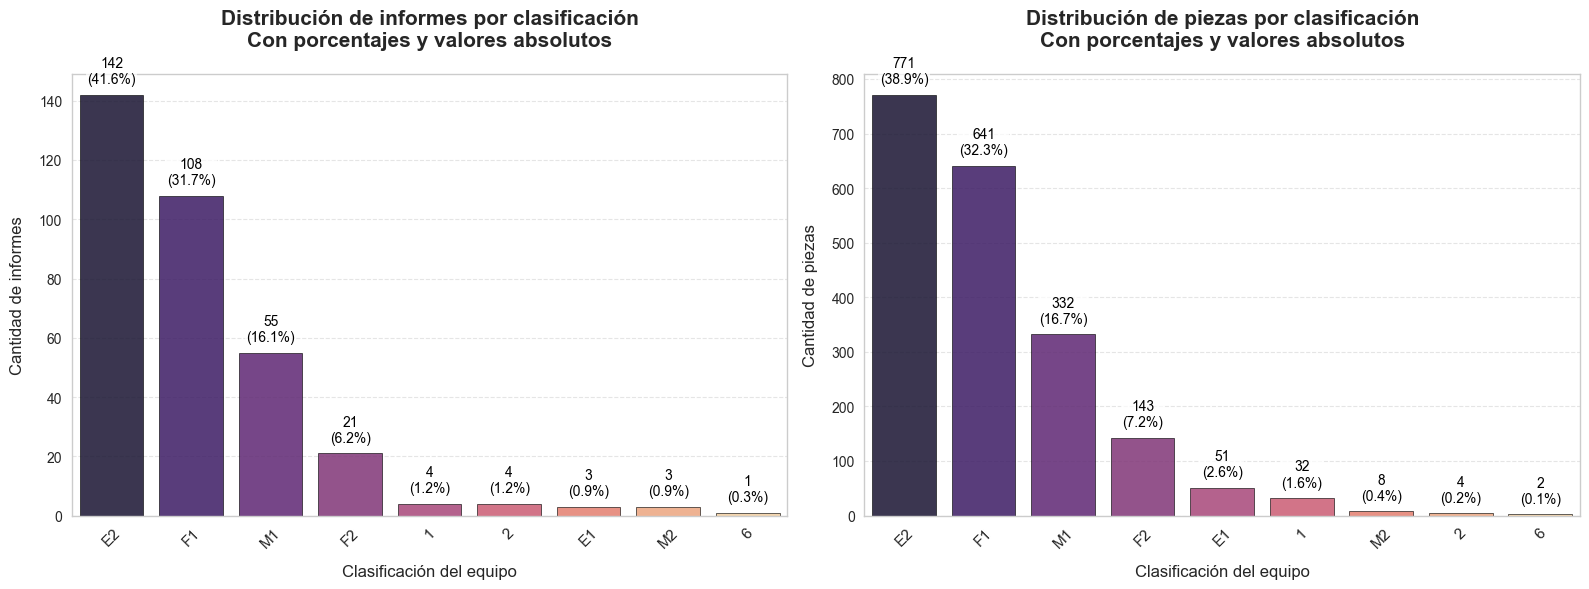

In [ ]:
plt.figure(figsize=(10, 7))
sns.set_style("whitegrid")

# Crear una figura con dos subplots (1 fila, 2 columnas)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Primer gr√°fico: Cantidad de informes por clasificaci√≥n ---
# Calculamos los porcentajes
total = qty_per_class['rep_qty'].sum()
qty_per_class['percentage'] = (qty_per_class['rep_qty'] / total) * 100

sns.barplot(
    x='classification',
    y='rep_qty',
    hue='classification',  # Added to address warning
    data=qty_per_class,
    palette='magma',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.85,
    dodge=False,  # Prevents side-by-side bars when using hue
    legend=False,
    ax=axes[0]  # Hides redundant legend
)

# A√±adir etiquetas con valores absolutos y porcentajes
for i, bar in enumerate(axes[0].patches):
    height = bar.get_height()
    percentage = qty_per_class['percentage'].iloc[i]
    
    axes[0].text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + (0.02 * max(qty_per_class['rep_qty'])),  # Offset din√°mico
        s=f"{height:.0f}\n({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# Mejorar el t√≠tulo y etiquetas
axes[0].set_title("Distribuci√≥n de informes por clasificaci√≥n\nCon porcentajes y valores absolutos", 
                  fontsize=15, pad=20, fontweight='bold')
axes[0].set_xlabel("Clasificaci√≥n del equipo", fontsize=12, labelpad=10)
axes[0].set_ylabel("Cantidad de informes", fontsize=12, labelpad=10)

# Rotaci√≥n y formato de ejes
axes[0].tick_params(axis='x', rotation=45, labelsize=11)
axes[0].tick_params(axis='y', labelsize=10)

# Cuadr√≠cula
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# --- Segundo gr√°fico: Cantidad de piezas por clasificaci√≥n ---
# Calculamos los porcentajes
total = qty_per_class['qty_pieces'].sum()
qty_per_class['percentage'] = (qty_per_class['qty_pieces'] / total) * 100

# Ordenar el DataFrame por 'qty_pieces' de forma descendente
qty_per_class_ordenado = qty_per_class.sort_values(by='qty_pieces', ascending=False)

sns.barplot(
    x='classification',
    y='qty_pieces',
    hue='classification',  # Added to address warning
    data=qty_per_class_ordenado,  # Usar el DataFrame ordenado
    palette='magma',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.85,
    dodge=False,  # Prevents side-by-side bars when using hue
    legend=False,
    ax=axes[1]  # Hides redundant legend
)

# A√±adir etiquetas con valores absolutos y porcentajes
for i, bar in enumerate(axes[1].patches):
    height = bar.get_height()
    percentage = qty_per_class_ordenado['percentage'].iloc[i]  # Usar el DataFrame ordenado

    axes[1].text(
        x=bar.get_x() + bar.get_width() / 2,
        y=height + (0.02 * max(qty_per_class_ordenado['qty_pieces'])),  # Offset din√°mico
        s=f"{height:.0f}\n({percentage:.1f}%)",
        ha="center",
        va="bottom",
        fontsize=10,
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

# Mejorar el t√≠tulo y etiquetas
axes[1].set_title("Distribuci√≥n de piezas por clasificaci√≥n\nCon porcentajes y valores absolutos",
                    fontsize=15, pad=20, fontweight='bold')
axes[1].set_xlabel("Clasificaci√≥n del equipo", fontsize=12, labelpad=10)
axes[1].set_ylabel("Cantidad de piezas", fontsize=12, labelpad=10)

# Rotaci√≥n y formato de ejes
axes[1].tick_params(axis='x', rotation=45, labelsize=11)
axes[1].tick_params(axis='y', labelsize=10)

# Cuadr√≠cula
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Ajustar m√°rgenes
plt.tight_layout()
plt.show()


### Distribuci√≥n de Informes y Cantidad de Piezas por Clasificaci√≥n  


### üîç Hallazgos Clave  
1. **Dominancia clara**:  
   - La clasificaci√≥n **E2** concentra el **41.9% del total de informes** (339 informes) y el **38.9% de las piezas** (1984 piezas).  
   - Las categor√≠as (E2, F1, M1 Y F2) representan **95.6%** del total de informes (339 informes) y el **95.1%** de las piezas (1984 piezas). 

2. **Cola larga**:  
   - 5 clasificaciones (1, 2, E1, M2 y 6) con ‚â§ 5.0% de participaci√≥n en total de informes y de piezas.
   - La clasificaci√≥n **E1** tiene un n√∫mero significativo de piezas (2.6% del total), pero solo representa el **0.9% de los informes**, lo que sugiere que cada informe involucra un n√∫mero elevado de piezas.

In [ ]:
qty_per_class['pieces_per_report'] = (qty_per_class['qty_pieces'] / qty_per_class['rep_qty']).round(2)
ratios = qty_per_class[['classification', 'pieces_per_report']].copy()
ratios.sort_values(by='pieces_per_report', ascending=False, inplace=True)
ratios

classification  pieces_per_report
3             E1              17.00
0              1               8.00
6             F2               6.81
7             M1               6.04
5             F1               5.94
4             E2               5.43
8             M2               2.67
2              6               2.00
1              2               1.00

In [ ]:
# Paletas refinadas de colores
blues = ["#0d47a1", "#2196f3", "#64b5f6", "#90caf9", "#c6dafc"]
greens = ["#006600", "#119911", "#55dd55", "#88ee88", "#bbffbb"]

# Ordenar y asignar colores (de m√°s alto a m√°s bajo)
sorted_indices_p = np.argsort(-qty_per_class['qty_pieces'])
sorted_indices_r = np.argsort(-qty_per_class['rep_qty'])

colors_p = [blues[min(i, len(blues)-1)] for i in range(len(qty_per_class))]
colors_r = [greens[min(i, len(greens)-1)] for i in range(len(qty_per_class))]

# Reasignar colores al orden original
colores_piezas = [None] * len(qty_per_class)
colores_reportes = [None] * len(qty_per_class)
for i, idx in enumerate(sorted_indices_p): colores_piezas[idx] = colors_p[i]
for i, idx in enumerate(sorted_indices_r): colores_reportes[idx] = colors_r[i]


# Crea el subplot: 1 fila, 2 columnas
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[1, 0.3],
    specs=[[{"type": "bar"}, {"type": "table"}]],
    horizontal_spacing=0.1  # Espaciado entre tabla y gr√°fico
)

# Piezas
fig.add_trace(
    go.Bar(
        x=qty_per_class['classification'],
        y=qty_per_class['qty_pieces'],
        name='Piezas',
        marker_color=colores_piezas,
        text=qty_per_class['qty_pieces'],
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Piezas: %{y:,}<extra></extra>',
    ),
    row=1, col=1
)

# Reportes
fig.add_trace(
    go.Bar(
        x=qty_per_class['classification'],
        y=qty_per_class['rep_qty'],
        name='Reportes',
        marker_color=colores_reportes,
        text=qty_per_class['rep_qty'],
        textposition='outside',
        hovertemplate='<b>%{x}</b><br>Reportes: %{y:,}<extra></extra>',
    ),
    row=1, col=1
)



fig.add_trace(
    go.Table(
        header=dict(values=['Clasificaci√≥n', 'Piezas por reporte'], fill_color='#5a4570', align='center',
            font=dict(color='white', size=14)),
        cells=dict(values=[ratios['classification'], ratios['pieces_per_report']],
            fill_color='#c6dafc',
            align='center',
            font=dict(color='black', size=12),
            format=[None, ",", ","]  # Formato con comas para valores num√©ricos
                   
                   ),
    ),
    row=1, col=2        
)

# Dise√±o limpio y agrupado
fig.update_layout(
    title=dict(
        text="<b>Piezas vs Reportes por Clasificaci√≥n</b>",
        x=0.5,
        font=dict(size=20)
    ),
    font=dict(family="Arial", size=13),
    barmode="group",  # <-- Agrupadas, no apiladas
    bargap=0.2,
    bargroupgap=0,
    template="plotly_white",
    height=650,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.3,  # Centrado sobre el gr√°fico izquierdo
        bgcolor='rgba(255,255,255,0.8)',
    ),
    margin=dict(t=80, b=50, l=60, r=40)
)

# Actualizar t√≠tulos de ejes para el gr√°fico de barras
fig.update_xaxes(title_text="Clasificaci√≥n", row=1, col=1)
fig.update_yaxes(title_text="Cantidad", row=1, col=1)

# Mostrar el gr√°fico
fig.show()

## An√°lisis de los tiempos de entrega por clasificaci√≥n de equipo

In [ ]:
class_del_time = qty_per_class[['classification','rep_qty', 'qty_pieces', 'deliv_time_avg']].sort_values(by='deliv_time_avg', ascending=False).reset_index(drop=True)
class_del_time['pieces_per_report'] = class_del_time['qty_pieces'] / class_del_time['rep_qty']
class_del_time['pieces_per_report'] = class_del_time['pieces_per_report'].round(2)
class_del_time

classification  rep_qty  qty_pieces  deliv_time_avg  pieces_per_report
0             E1        3        51.0           37.33              17.00
1              2        4         4.0           14.00               1.00
2              1        4        32.0           12.50               8.00
3             E2      142       771.0           11.63               5.43
4             M2        3         8.0            9.67               2.67
5             F2       21       143.0            9.05               6.81
6             F1      108       641.0            8.80               5.94
7             M1       55       332.0            8.47               6.04
8              6        1         2.0            5.00               2.00

class_del_time = mass_sin_errores.groupby(['classification'])['delivery_time'].mean().round(2).reset_index()
class_del_time

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Ordenar el dataframe por tiempo de entrega (descendente)
class_del_time_sorted = class_del_time.sort_values('deliv_time_avg', ascending=False)

# Crear el gr√°fico base con plotly express
fig = px.bar(
    class_del_time_sorted,
    y='classification',
    x='deliv_time_avg',
    text=[f'{x:.1f}' for x in class_del_time_sorted.deliv_time_avg],
    hover_data={
        'rep_qty': True,
        'qty_pieces': True,
        'pieces_per_report': ':.1f',
        'deliv_time_avg': False,
        'classification': False
    },
    labels={
        'deliv_time_avg': 'Tiempo de entrega (d√≠as)', 
        'classification': '',
        'rep_qty': 'Reportes',
        'qty_pieces': 'Piezas',
        'pieces_per_report': 'Piezas/reporte'
    },
    color='deliv_time_avg',  # Color basado en el valor del tiempo
    color_continuous_scale='RdBu',  # Usar escala verde-azul predefinida
    orientation='h',
    height=600
)

# Calcular el valor promedio
promedio_general = class_del_time.deliv_time_avg.mean()

# Personalizaci√≥n del estilo
fig.update_traces(
    textposition='outside',
    textfont=dict(size=12, color='#333333'),
    marker_line_color='#2d5f4d',
    marker_line_width=1,
    hovertemplate="<b>%{y}</b><br>Tiempo: %{x:.1f} d√≠as<br>Reportes: %{customdata[0]}<br>Piezas: %{customdata[1]}<br>Piezas/reporte: %{customdata[2]}"
)

# A√±adir l√≠nea para el promedio general
fig.add_shape(
    type="line",
    x0=promedio_general,
    y0=-0.5,
    x1=promedio_general,
    y1=len(class_del_time) - 0.5,
    line=dict(
        color="#ff6347",
        width=2,
        dash="dash",
    )
)

# A√±adir texto para el promedio
fig.add_annotation(
    x=promedio_general,
    y=len(class_del_time_sorted) - 0.5,
    text=f"Promedio: {promedio_general:.1f}",
    showarrow=False,
    font=dict(color="#ff6347", size=12),
    yshift=20
)

# Configurar el layout
fig.update_layout(
    title={
        'text': 'Tiempo promedio de entrega por clasificaci√≥n',
        'font': {'size': 18, 'family': 'Arial', 'color': '#333333'},
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center'
    },
    xaxis_title='D√≠as',
    plot_bgcolor='white',
    margin=dict(l=140, r=120, t=100, b=50),
    font=dict(family='Arial', size=12),
    coloraxis_colorbar=dict(
        title='D√≠as',
        thickness=15,
        len=0.6,
        tickformat='.1f'
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial'
    )
)

'''# A√±adir etiqueta "d√≠as" al final de cada barra
for i, value in enumerate(class_del_time_sorted.deliv_time_avg):
    fig.add_annotation(
        x=value,
        y=class_del_time_sorted.classification.iloc[i],
        #text="d√≠as",
        showarrow=False,
        xshift=30,
        font=dict(size=12, color="#555555")
    )'''

fig.show()

# An√°lisis de Casos At√≠picos y Recomendaciones

## üî¥ Casos At√≠picos Identificados

### 1. Demora Extrema en Calibraci√≥n (37.33 d√≠as)
- **Descripci√≥n**:  
  Tiempo de calibraci√≥n 7.5 veces mayor que el valor m√°s bajo (5 d√≠as)
- **Impacto**:  
  Puede retrasar toda la cadena de procesos del laboratorio

## üõ† Recomendaciones Espec√≠ficas

### Para Demora de 37.33 D√≠as
1. **Acci√≥n Inmediata**:  
    - Revisar el caso espec√≠fico para entender la causa de la demora.
    - Considerar la posibilidad de un mapeo del proceso que permita identificar los cuellos de botella.
    - Analizar si el tiempo de entrega se vio afectado por la cantidad de piezas enviadas o por la complejidad del equipo.
2. **Revisi√≥n del proceso**:
    - Evaluar si el tiempo de entrega asignado es adecuado para este tipo de calibraci√≥n.
    - Considerar la posibilidad de ajustar los tiempos asignados para evitar demoras excesivas en el futuro.
3. **Documentaci√≥n**:
    - Registrar el caso y las acciones tomadas para futuras referencias.
    - Utilizar esta informaci√≥n para mejorar los procesos y evitar demoras similares en el futuro.
4. **An√°lisis de datos**:
    - Realizar un an√°lisis de datos para identificar patrones o tendencias en los tiempos de entrega.
    - Utilizar esta informaci√≥n para mejorar la planificaci√≥n y la gesti√≥n de recursos en el laboratorio.

### --------------------------------------------------------------------------------------------------

## An√°lisis de los tiempos de entrega vs los tiempos asignados

In [ ]:
tiempo = loc_lab.groupby(['classification']).agg(
    rep_qty=('report_number', 'count'),
    qty_pieces=('piece_count', 'sum'),
    deliv_time_avg=('delivery_time', 'mean'),
    assigned_time_avg=('assigned_time', 'mean'),
    pieces_per_report=('piece_count', lambda x: x.sum() / len(x)),
).reset_index()
tiempo = tiempo.sort_values('rep_qty', ascending=False).round(2)
tiempo

classification  rep_qty  qty_pieces  deliv_time_avg  assigned_time_avg  \
4             E2      142       771.0           11.63              15.58   
5             F1      108       641.0            8.80              12.60   
7             M1       55       332.0            8.47              12.40   
6             F2       21       143.0            9.05              12.90   
0              1        4        32.0           12.50              15.50   
1              2        4         4.0           14.00              18.00   
3             E1        3        51.0           37.33              30.00   
8             M2        3         8.0            9.67              14.00   
2              6        1         2.0            5.00              12.00   

   pieces_per_report  
4               5.43  
5               5.94  
7               6.04  
6               6.81  
0               8.00  
1               1.00  
3              17.00  
8               2.67  
2               2.00

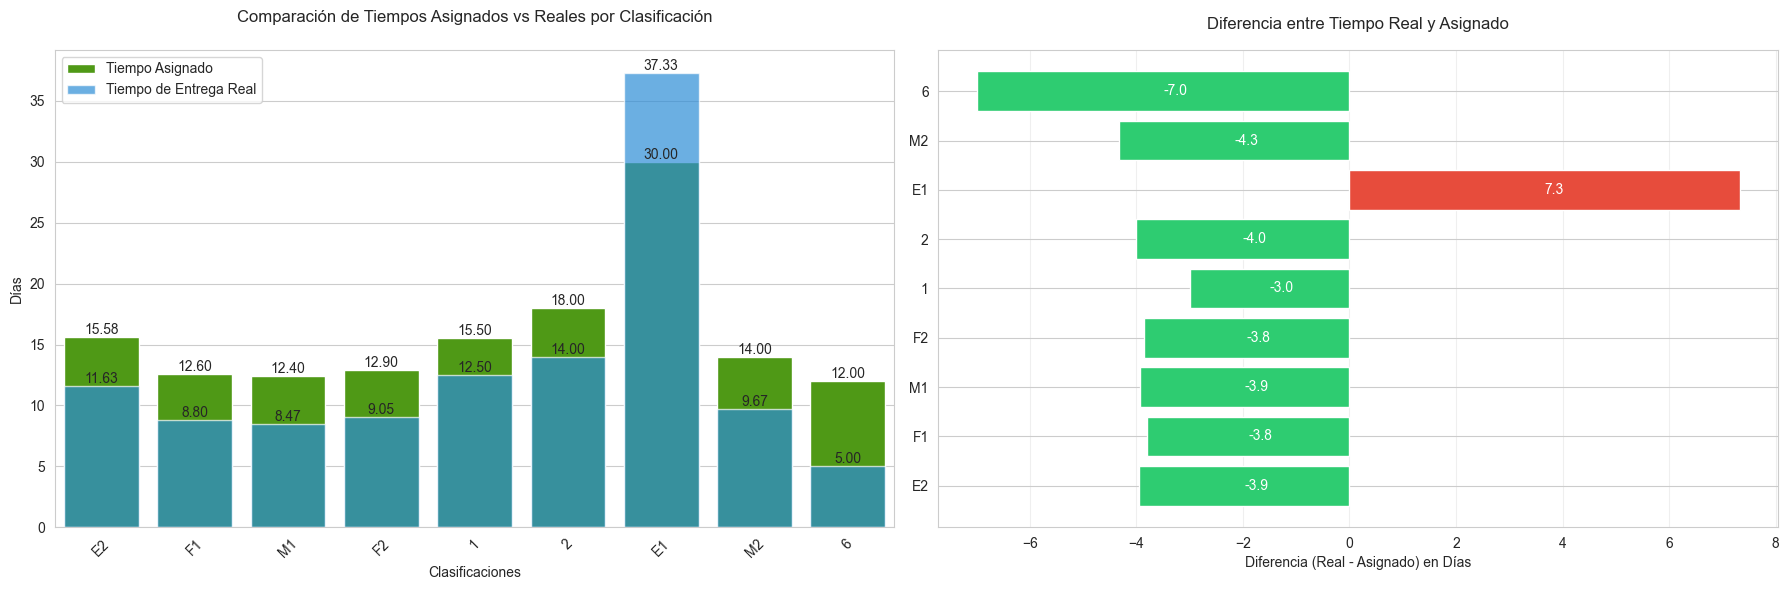

In [ ]:
equipos = tiempo['classification'].tolist()
asignado = tiempo['assigned_time_avg'].tolist()
real = tiempo['deliv_time_avg'].tolist()
diferencias = [r - a for r, a in zip(real, asignado)]

# Configurar la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# --- Primer Gr√°fico: Comparaci√≥n de Tiempos Asignados vs Reales ---
ax1 = axes[0]
sns.barplot(x=equipos, y=asignado, color='#4CAF00', label='Tiempo Asignado', ax=ax1)
sns.barplot(x=equipos, y=real, color='#1191F3', label='Tiempo de Entrega Real', alpha=0.7, ax=ax1)

# Personalizaci√≥n del primer gr√°fico
ax1.set_title('Comparaci√≥n de Tiempos Asignados vs Reales por Clasificaci√≥n', pad=20)
ax1.set_xlabel('Clasificaciones')
ax1.set_ylabel('D√≠as')
ax1.tick_params(axis='x', rotation=45)
ax1.legend()

# A√±adir valores al primer gr√°fico
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center',
                 xytext=(0, 5),
                 textcoords='offset points')

# --- Segundo Gr√°fico: Diferencia entre Tiempo Real y Asignado ---
ax2 = axes[1]
bars = ax2.barh(equipos, diferencias, color=np.where(np.array(diferencias) > 0, '#e74c3c', '#2ecc71'))

# Personalizaci√≥n del segundo gr√°fico
ax2.set_title('Diferencia entre Tiempo Real y Asignado', pad=15)
ax2.set_xlabel('Diferencia (Real - Asignado) en D√≠as')
ax2.grid(axis='x', alpha=0.3)

# A√±adir valores al segundo gr√°fico
for bar in bars:
    width = bar.get_width()
    ax2.text(width/2, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}',
             va='center',
             color='white' if abs(width) > 1 else 'black')

plt.tight_layout()
plt.show()

## An√°lisis General

**1.üìä Sobrestimaci√≥n General:**  
En la mayor√≠a de las clasificaciones, el tiempo asignado parece ser una sobreestimaci√≥n del tiempo de entrega real. Esto podr√≠a indicar:
- Procesos operativos eficientes.
- Planificaci√≥n conservadora en la asignaci√≥n.
- Ajustar los tiempos asignados para reflejar mejor la realidad operativa.
- Oportunidad de optimizaci√≥n en la asignaci√≥n de tiempos.

**2.‚ö†Ô∏è Problema Cr√≠tico en la Clasificaci√≥n "2":**  
La clasificaci√≥n "2" presenta una desviaci√≥n alarmante:
- Tiempo real **excede significativamente** el asignado.
- Requiere investigaci√≥n inmediata para identificar:
  - Cuellos de botella operativos.
  - Errores en la estimaci√≥n inicial.

**3.üìä Variabilidad en la Precisi√≥n de la Estimaci√≥n:**  
- Magnitud de diferencias (real vs. asignado) var√≠a entre clasificaciones.
- Sugiere inconsistencias en los m√©todos de estimaci√≥n.

**4.üîç Potencial de Optimizaci√≥n:**  
- Tiempo real menor al asignado en la mayor√≠a de casos se√±ala oportunidades para:
  - Ajustar est√°ndares de planificaci√≥n.
  - Reducir m√°rgenes de seguridad excesivos.
  - Verificar el impacto de la cantidad de piezas en el tiempo de entrega.
  - Considerar la posibilidad de ajustar los tiempos asignados para evitar sobrecargas en el proceso de calibraci√≥n.

---

##üí° Puntos Clave para la Acci√≥n

1. **Prioridad Urgente: Clasificaci√≥n "2"**  
   - Realizar an√°lisis de causa ra√≠z (ej: diagrama de Ishikawa o de espina de pescado).
   - Evaluar recursos asignados vs. requerimientos reales.

2. **Analizar Diferencias Negativas Destacadas**  
   - Identificar pr√°cticas eficientes en clasificaciones con:
   - Diferencias negativas mayores a 2 d√≠as.
   - Replicar buenas pr√°cticas en otras √°reas.

3. **Revisi√≥n del Proceso de Estimaci√≥n**  
   - Revisar las metodolog√≠as actuales de asignaci√≥n de tiempos.
   - Implementar sistema de feedback continuo entre equipos operativos y de planificaci√≥n.

---

**Conclusi√≥n**  
El gr√°fico revela:  
‚ö†Ô∏è **Falla cr√≠tica en Clasificaci√≥n "2"** (tiempo de entrega excesivo)  
‚úÖ **Sobrestimaci√≥n sistem√°tica** en otras clasificaciones (oportunidad de optimizaci√≥n).  

*Acciones recomendadas:*  
- Correcci√≥n inmediata para Clasificaci√≥n "2".  
- Estandarizaci√≥n de procesos de estimaci√≥n con datos hist√≥ricos.  

# -------------------------------------------------------------------

In [ ]:
loc_lab

report_number     so                            assignee  \
0       CCM0001.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
1       CCM0002.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
2       CCM0003.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
3       CCM0004.M/2025  H2381  Leobardo Maximiliano Brito Fonseca   
4    CCM0005.M/2025 v0  I0082  Leobardo Maximiliano Brito Fonseca   
..                 ...    ...                                 ...   
383     CCM1842.M/2024  H2416               Mario de Jes√∫s Garc√≠a   
384     CCM1862.M/2024  H2428                Sergio Cruz Santiago   
385     CCM1863.M/2024  H2428                Sergio Cruz Santiago   
386     CCM1864.M/2024  H2428                Sergio Cruz Santiago   
387     CCM1865.M/2024  H2428                Sergio Cruz Santiago   

                             calibrator                          supervisor  \
0    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
1    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
2    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
3    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
4    Leobardo Maximiliano Brito Fonseca            Gabriel Gallardo Camacho   
..                                  ...                                 ...   
383               Mario de Jes√∫s Garc√≠a  Leobardo Maximiliano Brito Fonseca   
384                Sergio Cruz Santiago            Francisco Torres Cabrera   
385                Sergio Cruz Santiago            Francisco Torres Cabrera   
386                Sergio Cruz Santiago            Francisco Torres Cabrera   
387                Sergio Cruz Santiago            Francisco Torres Cabrera   

                               approver classification lab_received_date  \
0              Gabriel Gallardo Camacho             E2        2024-12-05   
1              Gabriel Gallardo Camacho             E2        2024-12-05   
2              Gabriel Gallardo Camacho             E2        2024-12-05   
3              Gabriel Gallardo Camacho             E2        2024-12-05   
4              Gabriel Gallardo Camacho             E2        2025-01-21   
..                                  ...            ...               ...   
383  Leobardo Maximiliano Brito Fonseca             M1        2024-12-10   
384            Francisco Torres Cabrera              2        2024-12-11   
385            Francisco Torres Cabrera              2        2024-12-11   
386            Francisco Torres Cabrera              2        2024-12-11   
387            Francisco Torres Cabrera              2        2024-12-11   

    scheduled_delivery_date cleaning_date  ... assigned_time   priority  \
0                2025-01-06    2024-12-06  ...          20.0  ORDINARIO   
1                2025-01-06    2024-12-06  ...          20.0  ORDINARIO   
2                2025-01-06    2024-12-06  ...          20.0  ORDINARIO   
3                2025-01-06    2024-12-06  ...          20.0  ORDINARIO   
4                2025-01-31    2025-01-21  ...           8.0  ORDINARIO   
..                      ...           ...  ...           ...        ...   
383              2025-01-07    2024-12-17  ...          18.0  ORDINARIO   
384              2025-01-08    2024-12-12  ...          18.0  ORDINARIO   
385              2025-01-08    2024-12-12  ...          18.0  ORDINARIO   
386              2025-01-08    2024-12-12  ...          18.0  ORDINARIO   
387              2025-01-08    2024-12-12  ...          18.0  ORDINARIO   

     piece_count  year_received month_received  week_received  year_delivery  \
0            1.0           2024             12             49           2025   
1            1.0           2024             12             49           2025   
2            1.0           2024             12             49           2025   
3            1.0           2024             12             49           2025   
4            

In [ ]:
loc_lab.columns

Index(['report_number', 'so', 'assignee', 'calibrator', 'supervisor',
       'approver', 'classification', 'lab_received_date',
       'scheduled_delivery_date', 'cleaning_date', 'calibration_date',
       'delivery_date', 'delivery_time', 'assigned_time', 'priority',
       'piece_count', 'year_received', 'month_received', 'week_received',
       'year_delivery', 'month_delivery', 'week_delivery', 'equipment_type'],
      dtype='object')

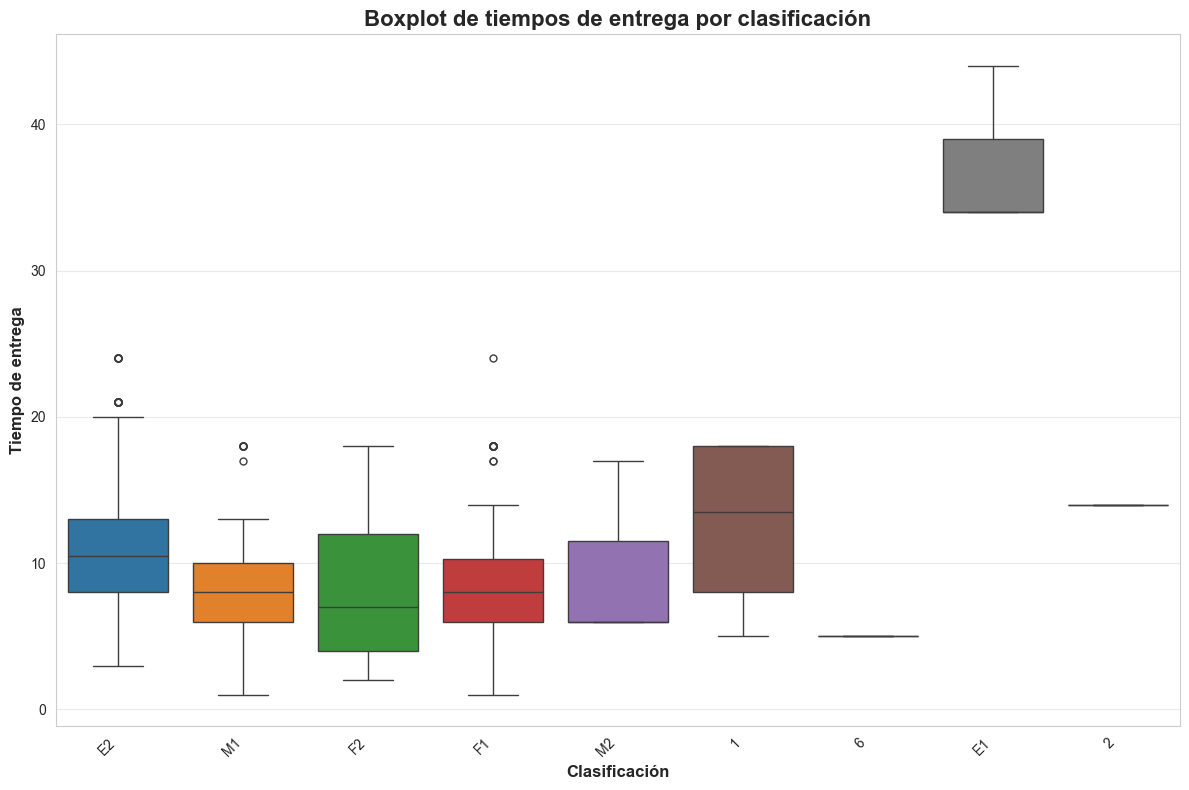

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
boxplot = sns.boxplot(x='classification', y='delivery_time', hue='classification', 
                      data=loc_lab, width=0.8, fliersize=5, whis=1.5, ax=ax)

# A√±adir etiquetas a los outliers
for i, artist in enumerate(boxplot.artists):
    # Obtener la clasificaci√≥n actual
    classification = loc_lab['classification'].unique()[i]
    
    # Obtener los datos para esta clasificaci√≥n
    category_data = loc_lab[loc_lab['classification'] == classification]['delivery_time']
    
    # Calcular Q1, Q3 e IQR
    Q1 = np.percentile(category_data, 25)
    Q3 = np.percentile(category_data, 75)
    IQR = Q3 - Q1
    
    # Identificar outliers
    outliers = category_data[(category_data < Q1 - 1.5 * IQR) | (category_data > Q3 + 1.5 * IQR)]
    
    # Para cada outlier, a√±adir una etiqueta
    for outlier_value in outliers:
        # Obtener el √≠ndice/fila del outlier
        outlier_index = loc_lab[(loc_lab['classification'] == classification) & 
                               (loc_lab['delivery_time'] == outlier_value)].index
        
        # Para cada √≠ndice encontrado (podr√≠a haber m√∫ltiples filas con el mismo valor)
        for idx in outlier_index:
            # Obtener la posici√≥n x (basada en la posici√≥n de la categor√≠a)
            x_pos = i
            
            # A√±adir etiqueta de texto
            ax.text(x_pos, outlier_value, f'{idx}', 
                    ha='center', va='bottom', fontsize=9, 
                    color='red', fontweight='bold')

# Personalizar el gr√°fico
plt.title('Boxplot de tiempos de entrega por clasificaci√≥n', fontsize=16, fontweight='bold')
plt.xlabel('Clasificaci√≥n', fontsize=12, fontweight='bold')
plt.ylabel('Tiempo de entrega', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()  # Ajustar dise√±o para evitar recortes
plt.show()

# An√°lisis: Boxplot de Tiempos de Entrega por Clasificaci√≥n

## Hallazgos principales

- **E1**: Tiempos de entrega significativamente superiores (33-39 d√≠as), con distribuci√≥n compacta que indica consistencia.

- **Clasificaciones est√°ndar** (E2, F1, F2, M1, M2, 1): Presentan medianas entre 7-13 d√≠as, formando un grupo homog√©neo con variaciones moderadas.

- **Outliers**: Detectados principalmente en E2, F1 y M1, con tiempos de entrega at√≠picos que llegan hasta ~24 d√≠as.

- **Casos especiales**: 
  - Clasificaci√≥n "6": Valor √∫nico o muy poca variaci√≥n (~5 d√≠as)
  - Clasificaci√≥n "2": Distribuci√≥n extremadamente compacta (~13 d√≠as)

## Variabilidad por clasificaci√≥n

| Clasificaci√≥n | Variabilidad | Mediana aproximada | Outliers |
|---------------|--------------|-------------------|----------|
| E1 | Baja | 35 d√≠as | No |
| 1 | Alta | 13 d√≠as | No |
| E2 | Media | 10 d√≠as | S√≠ (2) |
| F1 | Media | 8 d√≠as | S√≠ (3) |
| F2 | Alta | 7 d√≠as | No |
| M1 | Media | 8 d√≠as | S√≠ (2) |
| M2 | Media | 9 d√≠as | No |
| 6 | Muy baja | 5 d√≠as | No |
| 2 | Muy baja | 13 d√≠as | No |

## Implicaciones

1. **Segmentaci√≥n clara**: E1 constituye un grupo completamente separado, que requerir√≠a expectativas de entrega diferentes.

2. **Predictibilidad**: Las clasificaciones con baja variabilidad (E1, 6, 2) permiten estimaciones m√°s precisas de tiempos de entrega.

3. **Investigaci√≥n necesaria**: Los outliers identificados en varias clasificaciones sugieren incidentes espec√≠ficos que merecen an√°lisis para determinar causas de retrasos.

# ---------------------------------------------------------------------------

## Se comparan los tiempos de entrega promedios por clasificaci√≥n de equipo para ver si existe alguna relaci√≥n con la cantidad de piezas promedio por por cada clase.


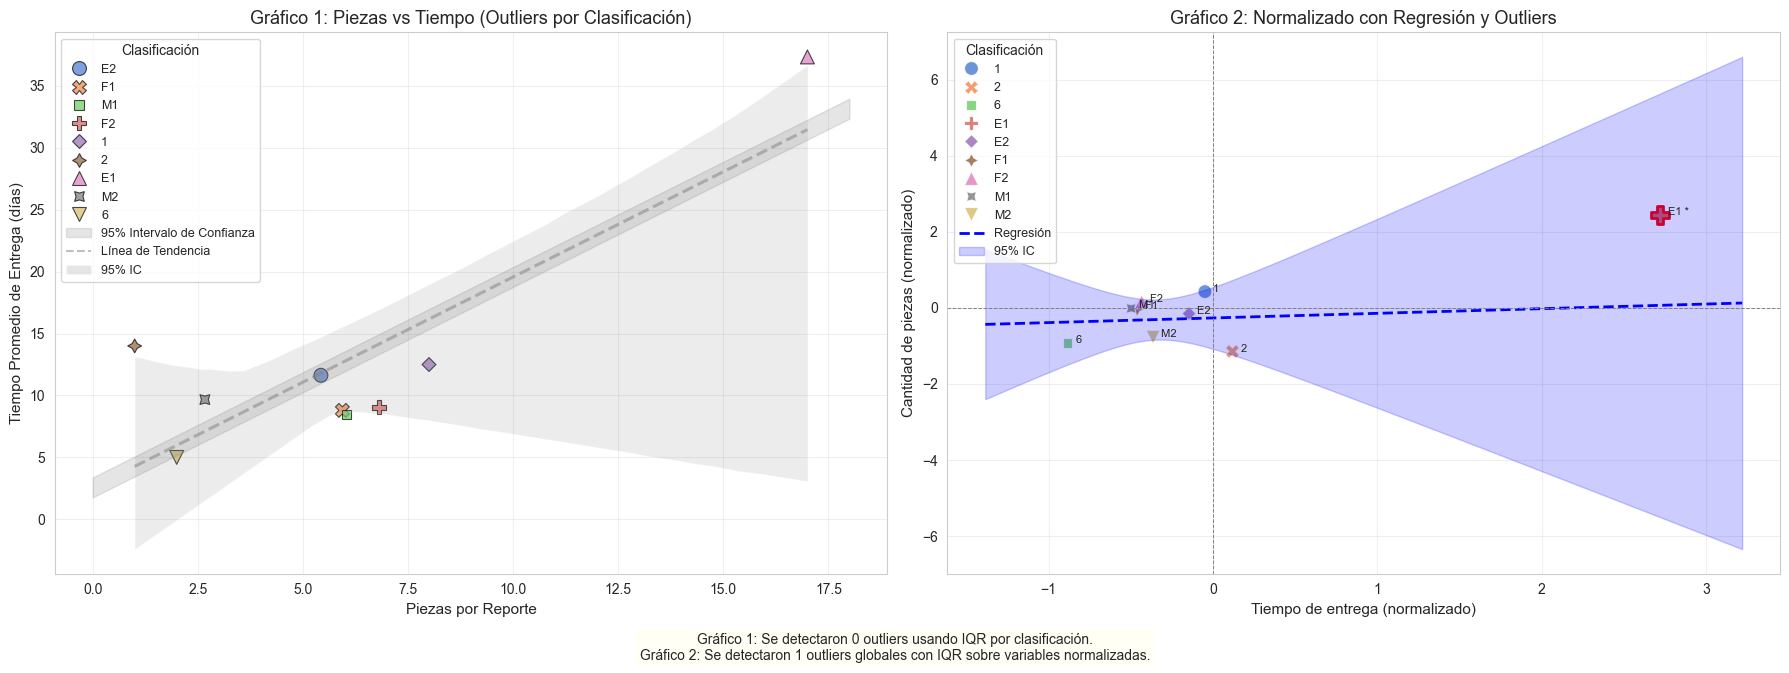

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Preparar los datos (asumiendo que 'tiempo' es el DataFrame original)
df1 = tiempo.reset_index()
df2 = tiempo[['classification', 'deliv_time_avg', 'pieces_per_report']].copy()
df2.rename(columns={'classification': 'Clasificaci√≥n',
                    'deliv_time_avg': 'Tiempo_entrega',
                    'pieces_per_report': 'Cantidad_piezas'}, inplace=True)
df2['Clasificaci√≥n'] = df2['Clasificaci√≥n'].astype('category')

# === FIGURA Y ESTILO GENERAL ===
sns.set_style("whitegrid")
sns.set_palette("muted")
fig, axs = plt.subplots(1, 2, figsize=(18, 7))
plt.subplots_adjust(wspace=0.3)

# === GR√ÅFICO 1: Sin normalizar, detecci√≥n IQR por grupo ===
def detect_outliers(df, variables):
    outlier_indices = []
    for var in variables:
        for classification, group in df.groupby('classification'):
            Q1 = group[var].quantile(0.25)
            Q3 = group[var].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            outliers = group[(group[var] < lower) | (group[var] > upper)]
            outlier_indices.extend(outliers.index.difference(outlier_indices))
    return outlier_indices

outlier_indices = detect_outliers(df1, ['pieces_per_report', 'deliv_time_avg'])
df1['is_outlier'] = df1.index.isin(outlier_indices)

# Scatterplot sin outliers
sns.scatterplot(
    data=df1[~df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    hue='classification',
    style='classification',
    s=100, alpha=0.7, edgecolor='black',
    ax=axs[0]
)

# Outliers resaltados
sns.scatterplot(
    data=df1[df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    hue='classification',
    style='classification',
    s=150, alpha=1.0, edgecolor='red', linewidth=2,
    legend=False, ax=axs[0]
)

# L√≠nea de regresi√≥n (sin outliers)
sns.regplot(
    data=df1[~df1['is_outlier']],
    x='pieces_per_report',
    y='deliv_time_avg',
    scatter=False,
    color='gray', line_kws={'linestyle':'--', 'alpha':0.5},
    ax=axs[0]
)

# Intervalo de confianza
x = df1.loc[~df1['is_outlier'], 'pieces_per_report'].values
y = df1.loc[~df1['is_outlier'], 'deliv_time_avg'].values
slope, intercept, _, _, std_err = stats.linregress(x, y)
x_pred = np.linspace(df1['pieces_per_report'].min() - 1, df1['pieces_per_report'].max() + 1, 100)
y_pred = intercept + slope * x_pred
axs[0].fill_between(
    x_pred,
    y_pred - 1.96 * std_err,
    y_pred + 1.96 * std_err,
    alpha=0.2, color='gray', label='95% Intervalo de Confianza'
)

# Anotaciones de outliers
for idx in outlier_indices:
    row = df1.loc[idx]
    axs[0].annotate(
        f"{row['classification']} (Outlier)",
        xy=(row['pieces_per_report'], row['deliv_time_avg']),
        xytext=(10, 10),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
        fontsize=8, color='darkred', weight='bold'
    )

axs[0].set_title("Gr√°fico 1: Piezas vs Tiempo (Outliers por Clasificaci√≥n)", fontsize=13)
axs[0].set_xlabel("Piezas por Reporte", fontsize=11)
axs[0].set_ylabel("Tiempo Promedio de Entrega (d√≠as)", fontsize=11)
axs[0].grid(True, alpha=0.3)

# Leyenda personalizada
handles, labels = axs[0].get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='gray', linestyle='--', alpha=0.5))
handles.append(plt.Rectangle((0,0), 1, 1, fc='gray', alpha=0.2))
labels.append('L√≠nea de Tendencia')
labels.append('95% IC')
axs[0].legend(handles=handles, labels=labels, title='Clasificaci√≥n', fontsize=9, title_fontsize=10)

# === GR√ÅFICO 2: Normalizado ===
scaler = StandardScaler()
df2[['Tiempo_norm', 'Cantidad_norm']] = scaler.fit_transform(df2[['Tiempo_entrega', 'Cantidad_piezas']])

# Detecci√≥n IQR global
Q1_t, Q3_t = df2['Tiempo_norm'].quantile([0.25, 0.75])
IQR_t = Q3_t - Q1_t
Q1_p, Q3_p = df2['Cantidad_norm'].quantile([0.25, 0.75])
IQR_p = Q3_p - Q1_p
df2['es_outlier'] = ((df2['Tiempo_norm'] < Q1_t - 1.5 * IQR_t) | (df2['Tiempo_norm'] > Q3_t + 1.5 * IQR_t) |
                     (df2['Cantidad_norm'] < Q1_p - 1.5 * IQR_p) | (df2['Cantidad_norm'] > Q3_p + 1.5 * IQR_p))

# Scatterplot
sns.scatterplot(
    data=df2[~df2['es_outlier']], 
    x='Tiempo_norm', 
    y='Cantidad_norm', 
    hue='Clasificaci√≥n', 
    style='Clasificaci√≥n', 
    s=100, alpha=0.8, ax=axs[1]
)
sns.scatterplot(
    data=df2[df2['es_outlier']], 
    x='Tiempo_norm', 
    y='Cantidad_norm', 
    hue='Clasificaci√≥n',
    style='Clasificaci√≥n',
    s=150,
    edgecolor='red',
    linewidth=2,
    marker='X',
    legend=False,
    ax=axs[1]
)

# Regresi√≥n lineal
df_no_outliers = df2[~df2['es_outlier']]
X = df_no_outliers[['Tiempo_norm']].values.reshape(-1, 1)
y = df_no_outliers['Cantidad_norm'].values
modelo = LinearRegression().fit(X, y)

x_range = np.linspace(df2['Tiempo_norm'].min() - 0.5, df2['Tiempo_norm'].max() + 0.5, 100)
y_pred = modelo.predict(x_range.reshape(-1, 1))
axs[1].plot(x_range, y_pred, color='blue', linestyle='--', linewidth=2, label='Regresi√≥n')

# Intervalo de confianza
X_orig = df_no_outliers['Tiempo_norm'].values
y_orig = df_no_outliers['Cantidad_norm'].values
n = len(X_orig)
mean_x = np.mean(X_orig)
residuos = y_orig - modelo.predict(X_orig.reshape(-1, 1))
std_error = np.sqrt(np.sum(residuos**2) / (n - 2))
t_critical = stats.t.ppf(0.975, n - 2)

ci_lower, ci_upper = [], []
for x_val in x_range:
    se_y_pred = std_error * np.sqrt(1/n + (x_val - mean_x)**2 / np.sum((X_orig - mean_x)**2))
    ci_lower.append(modelo.predict([[x_val]])[0] - t_critical * se_y_pred)
    ci_upper.append(modelo.predict([[x_val]])[0] + t_critical * se_y_pred)

axs[1].fill_between(x_range, ci_lower, ci_upper, color='blue', alpha=0.2, label='95% IC')

# Anotaciones
for _, row in df2.iterrows():
    marker = '*' if row['es_outlier'] else ''
    axs[1].text(row['Tiempo_norm'] + 0.05, row['Cantidad_norm'], 
                f"{row['Clasificaci√≥n']} {marker}", fontsize=8)

axs[1].axhline(0, color='grey', linestyle='--', linewidth=0.7)
axs[1].axvline(0, color='grey', linestyle='--', linewidth=0.7)
axs[1].set_title("Gr√°fico 2: Normalizado con Regresi√≥n y Outliers", fontsize=13)
axs[1].set_xlabel("Tiempo de entrega (normalizado)", fontsize=11)
axs[1].set_ylabel("Cantidad de piezas (normalizado)", fontsize=11)
axs[1].legend(title='Clasificaci√≥n', fontsize=9, title_fontsize=10)
axs[1].grid(True, alpha=0.3)

# Texto explicativo final
fig.text(0.5, 0.01, 
         f"Gr√°fico 1: Se detectaron {len(outlier_indices)} outliers usando IQR por clasificaci√≥n.\n"
         f"Gr√°fico 2: Se detectaron {df2['es_outlier'].sum()} outliers globales con IQR sobre variables normalizadas.",
         ha='center', fontsize=10, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.3))

plt.tight_layout(rect=[0, 0.05, 1, 0.96])
plt.show()


# An√°lisis de la Relaci√≥n entre Cantidad de Piezas y Tiempo de Entrega

## Resumen 

Se analiza la relaci√≥n entre la cantidad de piezas y el tiempo de entrega a partir de dos visualizaciones complementarias: un gr√°fico normalizado y otro con valores originales. Los datos revelan una correlaci√≥n positiva d√©bil entre ambas variables, con las clasificaciones mostrando comportamientos diferenciados.

## An√°lisis de Visualizaciones

### Gr√°fico No Normalizado (Imagen 1)
- **Correlaci√≥n:** Confirma la relaci√≥n positiva entre piezas por reporte y tiempo de entrega
- **Rango:** Tiempos de entrega entre 5 y 37 d√≠as aproximadamente
- **Outliers:** No se detectaron valores at√≠picos seg√∫n el m√©todo IQR aplicado
- **Dispersi√≥n:** Mayor concentraci√≥n de datos en la zona central del gr√°fico

### Gr√°fico Normalizado (Imagen 2)
- **Correlaci√≥n:** Muestra una tendencia positiva d√©bil con pendiente de 0.11
- **Outliers:** Se identific√≥ un valor at√≠pico (punto E1) mediante el m√©todo IQR
- **Comportamiento:** El intervalo de confianza se ensancha significativamente en los extremos, indicando mayor incertidumbre predictiva
- **Metodolog√≠a:** La l√≠nea de regresi√≥n y el intervalo de confianza se calcularon excluyendo outliers



## Hallazgos Principales

1. **Correlaci√≥n positiva:** A mayor cantidad de piezas, mayor tiempo de entrega, aunque esta relaci√≥n no es fuerte.

2. **Comportamiento por categor√≠as:** Las diferentes clasificaciones (1, 2, 6, E1, E2, F1, F2, M1, M2) muestran patrones distintos:
   - El punto E1 presenta el tiempo de entrega m√°s elevado
   - Categor√≠as como M1, F1 y F2 tienden a agruparse
   - Las clasificaciones (1, 2, 6) presentan mayor variabilidad

3. **Variabilidad predictiva:** La amplitud del intervalo de confianza sugiere que:
   - Los pron√≥sticos son m√°s precisos para valores centrales
   - Existe alta incertidumbre en predicciones para cantidades extremas de piezas

4. **Efecto de la normalizaci√≥n:** La transformaci√≥n de los datos facilita la identificaci√≥n de valores at√≠picos que no ser√≠an evidentes en la escala original.

## Conclusiones

- Existe una relaci√≥n positiva pero moderada entre la cantidad de piezas y el tiempo de entrega
- La categorizaci√≥n de los productos influye significativamente en los tiempos de entrega
- La normalizaci√≥n de datos mejora la detecci√≥n de valores at√≠picos y patrones no evidentes
- Se recomienda considerar factores adicionales m√°s all√° de la cantidad de piezas para mejorar la precisi√≥n en la estimaci√≥n de tiempos de entrega

## Recomendaciones

1. Investigar las causas del comportamiento at√≠pico de la categor√≠a E1
2. Desarrollar modelos predictivos espec√≠ficos por categor√≠a de producto
3. Incorporar variables adicionales para mejorar la precisi√≥n de las estimaciones
4. Realizar seguimiento continuo para identificar tendencias o cambios en los patrones detectados

# -----------------------------------------------------------------------------

## An√°lisis de tendencias

In [ ]:
tiempo_gral = mass_sin_errores.loc[mass_sin_errores['service_location'] == 'LAB'][['report_number','classification', 'lab_received_date','assigned_time', 'delivery_date ','delivery_time', ]].copy()

KeyError: "['delivery_date '] not in index"

In [ ]:
# Agregar efectividad a la tabla
tiempo_gral['efectividad'] = (tiempo_gral['delivery_time']/tiempo_gral['assigned_time']).round(2)
tiempo_gral
salva = tiempo_gral.copy()

In [ ]:
# Renombrar columnas para evitar problemas 
tiempo_gral.rename(columns={'delivery_date ': 'delivery_date'}, inplace=True)


In [ ]:
# Convertir a datetime y crear columnas de periodo
#tiempo_gral['delivery_date'] = pd.to_datetime(tiempo_gral['delivery_date'])
tiempo_gral['semana'] = tiempo_gral['delivery_date'].dt.to_period('W-SUN')  # Semana que comienza en lunes
tiempo_gral['mes'] = tiempo_gral['delivery_date'].dt.to_period('M')

### An√°lisis de la tendencia de los tiempos por semana

In [ ]:
time_per_week = tiempo_gral.groupby(['semana'])['delivery_time'].mean().round(2).reset_index()
time_per_week['semana'] = time_per_week['semana'].dt.start_time
time_per_week['semana'] = time_per_week['semana'].dt.strftime('%d-%b')
time_per_week.rename(columns={'delivery_time': 'Tiempo Promedio'}, inplace=True)
time_per_week

In [ ]:
df = time_per_week.copy()

# Configuraci√≥n de estilo profesional
sns.set_theme(style="whitegrid", context="talk")  # Estilo m√°s moderno y tama√±o de fuentes adecuado
plt.figure(figsize=(14, 7))  # Tama√±o m√°s grande para mejor visualizaci√≥n

# Paleta de colores personalizada
colors = sns.color_palette("husl", 2)

# Gr√°fico de l√≠nea principal
ax = sns.lineplot(
    data=df,
    x='semana',
    y='Tiempo Promedio',
    marker='o',
    markersize=10,
    linewidth=2.5,
    color=colors[0],
    markerfacecolor='white',
    markeredgewidth=2,
    label='Tiempo semanal'
)

# Personalizaci√≥n avanzada del gr√°fico
ax.set_title('Evoluci√≥n Semanal del Tiempo Promedio de Entrega\nPrimer Trimestre 2024', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Semana', fontsize=14, labelpad=15)
ax.set_ylabel('D√≠as Promedio', fontsize=14, labelpad=15)

# Formateo de ejes
plt.xticks(rotation=50, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# L√≠nea de promedio general
mean_val = df['Tiempo Promedio'].mean()
plt.axhline(
    y=mean_val, 
    color=colors[1], 
    linestyle='--', 
    linewidth=2,
    alpha=0.8,
    label=f'Promedio general ({mean_val:.1f} d√≠as)'
)

# Etiquetas de datos mejoradas
for i, row in df.dropna().iterrows():
    ax.text(
        i, 
        row['Tiempo Promedio'] + 0.3,  # Ajuste de posici√≥n vertical
        f'{row["Tiempo Promedio"]:.1f}d', 
        ha='center', 
        va='bottom',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Elementos adicionales
sns.despine(left=True)  # Eliminar bordes para un look m√°s limpio
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.1)

# Leyenda mejorada
plt.legend(
    loc='upper right', 
    frameon=True, 
    framealpha=0.9,
    fontsize=12
)

# Ajuste final de layout
plt.tight_layout()

# Mostrar gr√°fico
plt.show()

# üìà An√°lisis de Datos (Unidades Asumidas en D√≠as)

## üìå M√©tricas Clave
| **Indicador**       | **Valor**          | **Detalle**                         |
|----------------------|--------------------|--------------------------------------|
| M√°ximo Hist√≥rico     | 19.9 d√≠as          | Semana del 6 de enero                          |
| M√≠nimo Hist√≥rico     | 6.3 d√≠as           | Semana del 17 de febrero                            |
| Promedio Trimestral  | 10.2 d√≠as          |        |
| Casos >14 d√≠as       | 3 semanas          | Semanas 1, 2, 14 y 15               |
| Variabilidad         | 13.6 d√≠as          | Diferencia entre m√°ximo y m√≠nimo    |

---

## üö® Alertas Operativas
1. **Incremento Extremo**:  
   - Semana 1 (19.9d) supera en **216%** el m√≠nimo hist√≥rico (6.3d)  
   - *Impacto*: Retraso equivalente a 3.3 semanas laborales est√°ndar  

2. **Tendencia Ascendente Final**:  
   - √öltimas 2 semanas: **14.6d** (36% sobre el promedio)  
   - *Patr√≥n*: Aumento del 22% respecto a la semana 13 (12.0d)  

3. **Inconsistencia Temporal**:  
   - 15 semanas registradas (trimestre est√°ndar: 13 semanas)  

---

## üîÑ Distribuci√≥n Temporal
```python
semanas = [19.9, 16.6, 9.2, 8.9, 6.8, 7.5, 6.3, 7.1, 8.8, 7.1, 9.6, 11.7, 12.0, 14.6, 14.6]
distribucion = {
    '<7d': sum(1 for d in semanas if d < 7),      # 1 semana
    '7-10d': sum(1 for d in semanas if 7 <= d <=10),  # 7 semanas
    '10-14d': sum(1 for d in semanas if 10 < d <=14), # 4 semanas
    '>14d': sum(1 for d in semanas if d >14)          # 3 semanas
}

# üìà An√°lisis de Datos 

## üìå M√©tricas Clave
| **Indicador**       | **Valor**          | **Detalle**                         |
|----------------------|--------------------|--------------------------------------|
| M√°ximo Hist√≥rico     | 19.9 d√≠as          | Semana 2                            |
| M√≠nimo Hist√≥rico     | 6.3 d√≠as           | Semana 8                            |
| Promedio Trimestral  | 10.2 d√≠as          | ----------------------------        |
| Casos >14 d√≠as       | 3 semanas          | Semanas 1, 2 y 3                    |
| Variabilidad         | 13.6 d√≠as          | Diferencia entre m√°ximo y m√≠nimo    |

---

## üö® Alertas Operativas
1. **Incremento Extremo**:  
   - Semana 1 (19.9d) supera en **216%** el m√≠nimo hist√≥rico (6.3d)  
   - *Impacto*: Retraso equivalente a 3.3 semanas laborales est√°ndar  

2. **Tendencia Ascendente Final**:  
   - √öltimas 2 semanas: **14.6d** (36% sobre el promedio)  
   - *Patr√≥n*: Aumento del 22% respecto a la semana 13 (12.0d)  
 

---


### An√°lisis de la tendencia de los tiempos por meses

In [ ]:
time_per_month = tiempo_gral.groupby(['mes'])['delivery_time'].mean().round(2).reset_index()
time_per_month['mes'] = time_per_month['mes'].dt.start_time
time_per_month['mes'] = time_per_month['mes'].dt.strftime('%b')
time_per_month.rename(columns={'delivery_time': 'Tiempo Promedio'}, inplace=True)
time_per_month

In [ ]:
df_1 = time_per_month.copy()

# Configuraci√≥n de estilo profesional
sns.set_theme(style="whitegrid", context="talk")  # Estilo m√°s moderno y tama√±o de fuentes adecuado
plt.figure(figsize=(14, 7))  # Tama√±o m√°s grande para mejor visualizaci√≥n

# Paleta de colores personalizada
colors = sns.color_palette("husl", 2)

# Gr√°fico de l√≠nea principal
ax = sns.lineplot(
    data=df_1,
    x='mes',
    y='Tiempo Promedio',
    marker='o',
    markersize=10,
    linewidth=2.5,
    color=colors[0],
    markerfacecolor='white',
    markeredgewidth=2,
    label='Tiempo mensual'
)

# Personalizaci√≥n avanzada del gr√°fico
ax.set_title('Evoluci√≥n Mensual del Tiempo Promedio de Entrega\nPrimer Trimestre 2024', 
             fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Mes', fontsize=14, labelpad=15)
ax.set_ylabel('D√≠as Promedio', fontsize=14, labelpad=15)

# Formateo de ejes
plt.xticks(rotation=50, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# L√≠nea de promedio general
mean_val = df_1['Tiempo Promedio'].mean()
plt.axhline(
    y=mean_val, 
    color=colors[1], 
    linestyle='--', 
    linewidth=2,
    alpha=0.8,
    label=f'Promedio general ({mean_val:.1f} d√≠as)'
)

# Etiquetas de datos mejoradas
for i, row in df_1.dropna().iterrows():
    ax.text(
        i, 
        row['Tiempo Promedio'] + 0.3,  # Ajuste de posici√≥n vertical
        f'{row["Tiempo Promedio"]:.1f}d', 
        ha='center', 
        va='bottom',
        fontsize=11,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2)
    )

# Elementos adicionales
sns.despine(left=True)  # Eliminar bordes para un look m√°s limpio
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0.1)

# Leyenda mejorada
plt.legend(
    loc='upper right', 
    frameon=True, 
    framealpha=0.9,
    fontsize=12
)

# Ajuste final de layout
plt.tight_layout()

# Mostrar gr√°fico
plt.show()

# üìå INFORME DE AN√ÅLISIS: TIEMPOS DE ENTREGA (Q1 2024)

## üìä **Hallazgos Clave**
- **Alta variabilidad**: Enero fue el peor mes (**14.8 d√≠as, +45% sobre el promedio**), mientras que marzo mejor√≥ significativamente (**7.1 d√≠as, -30%**).
- **Enero domina la variabilidad**: Explica el **48% de la fluctuaci√≥n total**.

## üö® **Riesgos Identificados**
- **Retraso cr√≠tico en enero**: Afecta tiempos de entrega en **1.5 semanas laborales**.
- **Tendencia irregular**: Reducci√≥n abrupta en marzo (se recomienda analizar las posibles causas).

## üîç **Recomendaciones**
1. **Investigar enero**: Determinar causas del pico (**14.8 d√≠as**).
2. **Replicar marzo**: Extender sus pr√°cticas exitosas para estabilizar tiempos.
-